In [42]:
import math
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time
from multiprocessing import Pool

## Глава первая. История его жизни.

Мы исследуем параметризованный итерационный процесс:

In [43]:
def process(x, a):
    return a * x * (1 - x)

Смоделируем 10 шагов функции:

In [44]:
def print_process(x0, a, steps, process):
    x = x0
    for _ in range(steps):
        print(round(x, 5), end=' ➔ ')
        x = process(x=x, a=a)
        # time.sleep(1)


In [45]:
print_process(x0=0.3, a=2, steps=10, process=process)

0.3 ➔ 0.42 ➔ 0.4872 ➔ 0.49967 ➔ 0.5 ➔ 0.5 ➔ 0.5 ➔ 0.5 ➔ 0.5 ➔ 0.5 ➔ 

Как видно, значение стабилизировалось на 0.5

Построим график процесса.

In [46]:
def draw_process_chart(x0, a, steps, process, every=1):
    """Функция рисования графика процесса"""
    x = x0
    xs = []
    for t in range(steps):
        if t%every == 0:
            xs.append(x)
        x = process(x, a)

    fig, ax = plt.subplots()
    plt.title(f'a = {round(a,5)}')

    ax.plot(xs)
    ax.grid()
    ax.set_xlabel('steps')
    ax.set_ylabel('x')
    plt.show()
    plt.close()

Мы будем много раз дальше рисовать этот график, и нужно поговорить о параметрах, которые мы в него передаем. Начальное значение x на самом деле, как выяснится далее, не очень важно - можно взять любое случайное число в пределах от 0 до 1. Желательно, однако, что бы это число было одним и тем же во всех графиках. Поэтому мы сгенерируем такое число и будем его использовать

In [47]:
X0 = np.random.random()
print(X0)

0.7009788236719682


steps означает число шагов (итераций) процесса.

every - параметр, обозначающий раз в сколько лет мы отмечаем значение процесса на графике. Это пригодится позже.

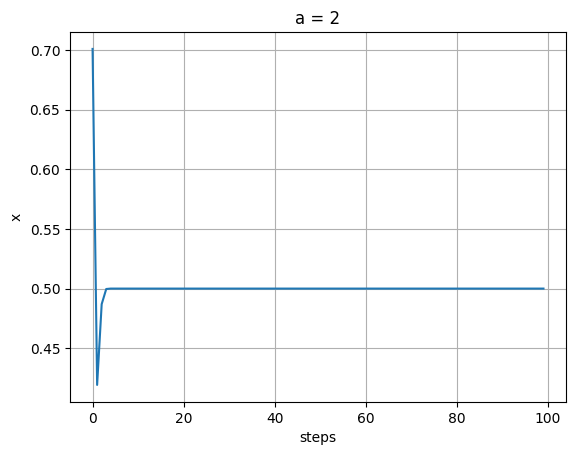

In [48]:
draw_process_chart(X0, a=2, steps=100, process=process)

Неподвижные точки процесса:

    x = 0
    x = (a-1)/a

In [49]:
def process(x, a):
    return a * x * (1 - x)

print_process(x0=X0, a=1.1, steps=10, process=process)

0.70098 ➔ 0.23057 ➔ 0.19515 ➔ 0.17277 ➔ 0.15721 ➔ 0.14575 ➔ 0.13696 ➔ 0.13002 ➔ 0.12443 ➔ 0.11984 ➔ 

Формулируем гипотезу: значение стабилизируется в неподвижной точке процесса. 

Проверим её на значения а = 3, a = 3.8:

In [50]:
print_process(x0=X0, a=3, steps=30, process=process)

0.70098 ➔ 0.62882 ➔ 0.70021 ➔ 0.62974 ➔ 0.6995 ➔ 0.6306 ➔ 0.69883 ➔ 0.6314 ➔ 0.6982 ➔ 0.63215 ➔ 0.69761 ➔ 0.63285 ➔ 0.69705 ➔ 0.63351 ➔ 0.69653 ➔ 0.63413 ➔ 0.69603 ➔ 0.63472 ➔ 0.69555 ➔ 0.63528 ➔ 0.6951 ➔ 0.63581 ➔ 0.69467 ➔ 0.63632 ➔ 0.69425 ➔ 0.6368 ➔ 0.69386 ➔ 0.63725 ➔ 0.69348 ➔ 0.63769 ➔ 

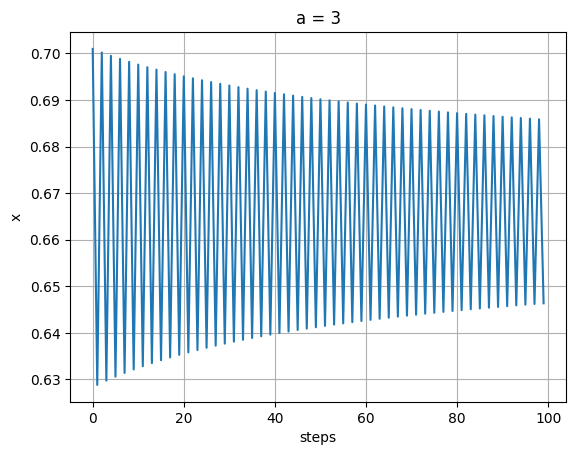

In [51]:
draw_process_chart(x0=X0, a=3, steps=100, process=process)

0.70098 ➔ 0.79651 ➔ 0.61591 ➔ 0.89894 ➔ 0.34521 ➔ 0.85895 ➔ 0.46038 ➔ 0.94404 ➔ 0.20076 ➔ 0.60973 ➔ 0.90424 ➔ 0.32903 ➔ 0.83893 ➔ 0.51349 ➔ 0.94931 ➔ 0.18286 ➔ 0.56781 ➔ 0.93253 ➔ 0.2391 ➔ 0.69133 ➔ 0.81089 ➔ 0.58271 ➔ 0.924 ➔ 0.26684 ➔ 0.74341 ➔ 0.72485 ➔ 0.75788 ➔ 0.6973 ➔ 0.80208 ➔ 0.60323 ➔ 

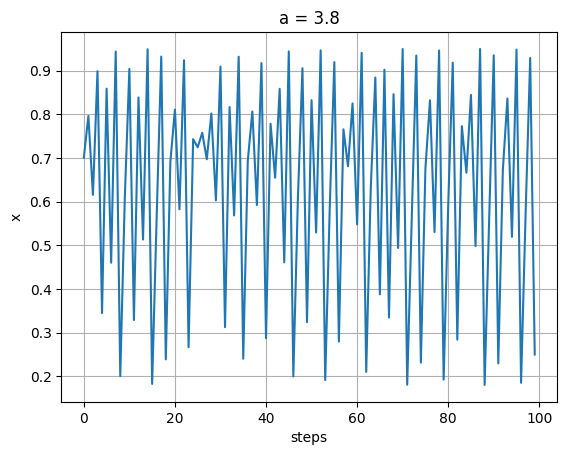

In [52]:
print_process(x0=X0, a=3.8, steps=30, process=process)
draw_process_chart(x0=X0, a=3.8, steps=100, process=process)

Как можно видеть, значение и не думает стабилизироваться. Гипотеза не верна!

Проверим, что будет происходить, если мы будем увеличивать а

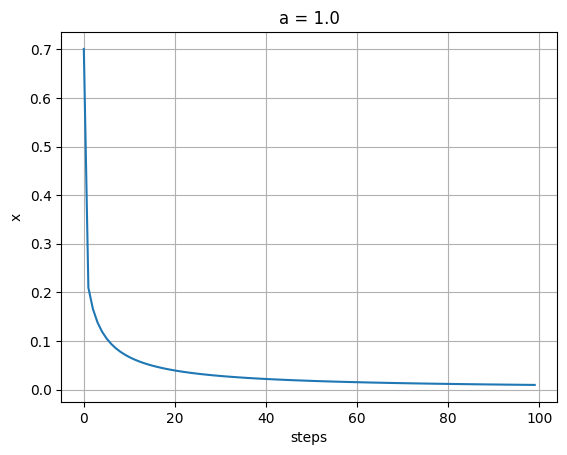

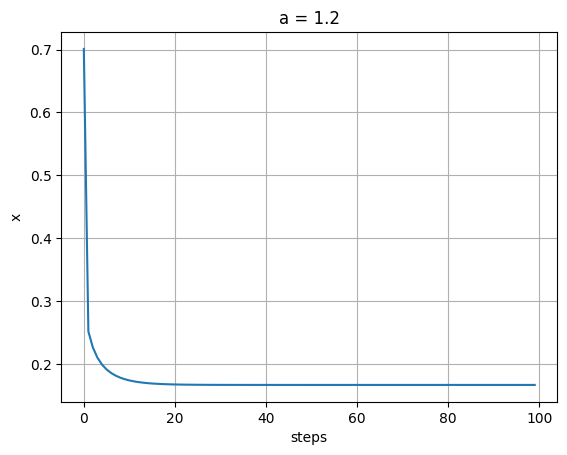

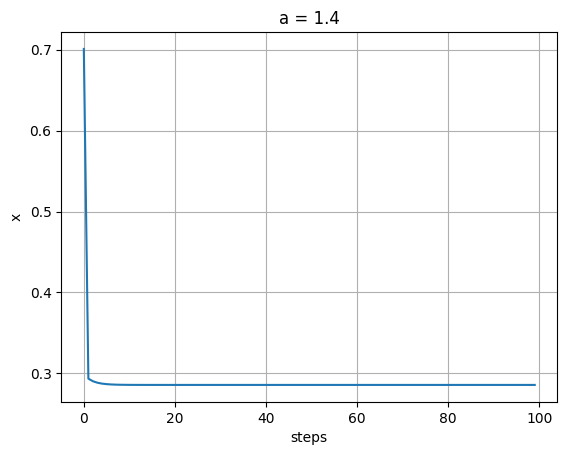

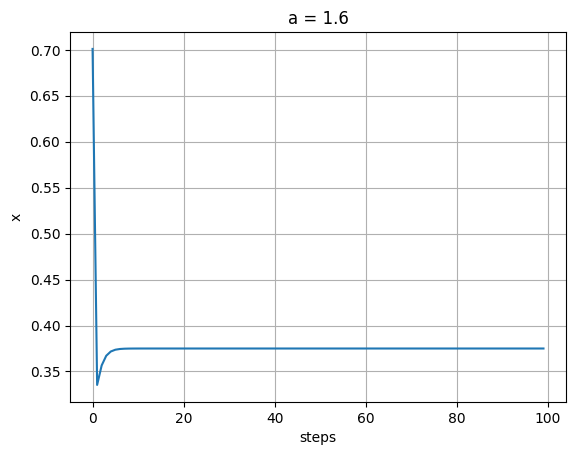

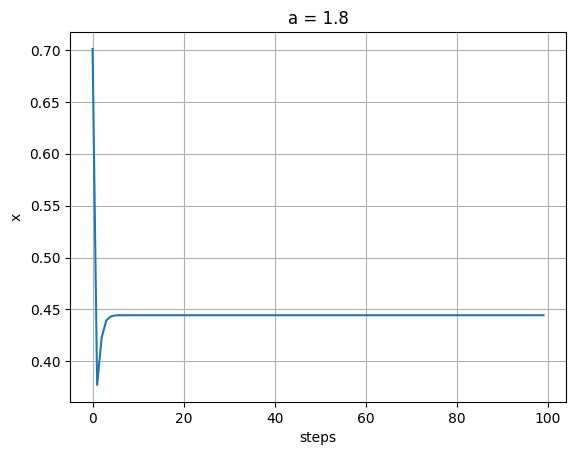

In [53]:
for a in np.arange(1, 2, 0.2):
    draw_process_chart(x0=X0, a=a, steps=100, process=process)

Пока всё идет хорошо. Значение стабилизируется в неподвижной точки процесса

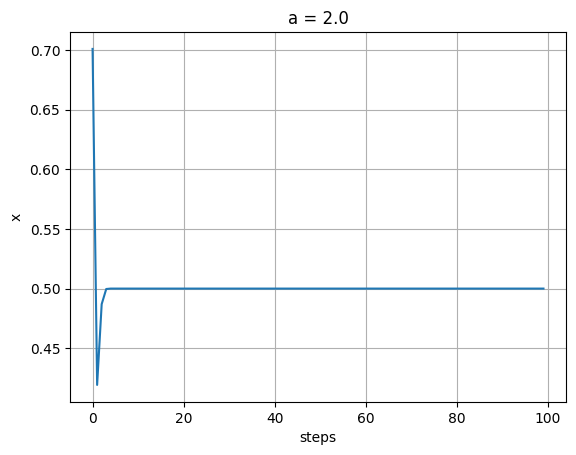

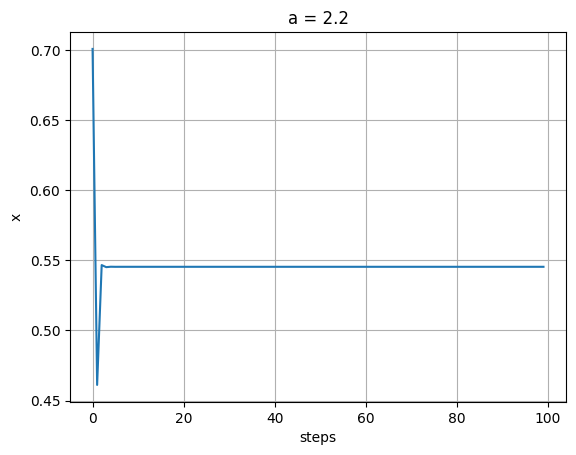

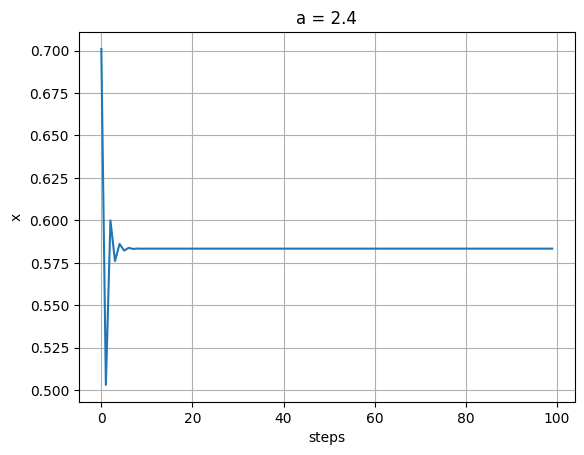

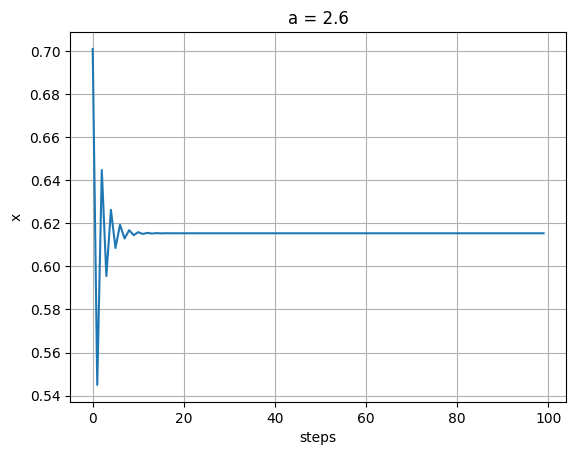

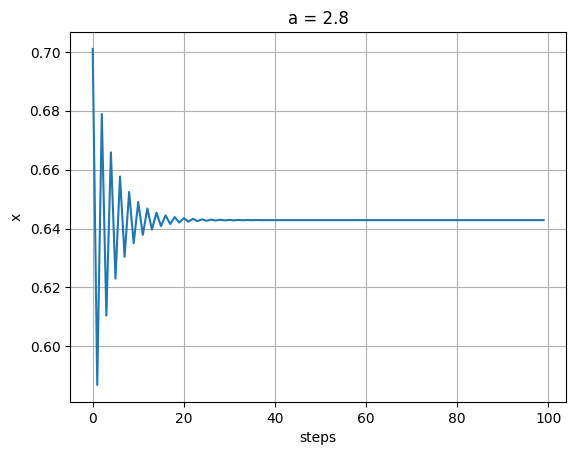

In [54]:
for a in np.arange(2, 2.9, 0.2):
    draw_process_chart(x0=X0, a=a, steps=100, process=process)

Мы видим, что возникает дрожание. Значение пытается стабилизироваться

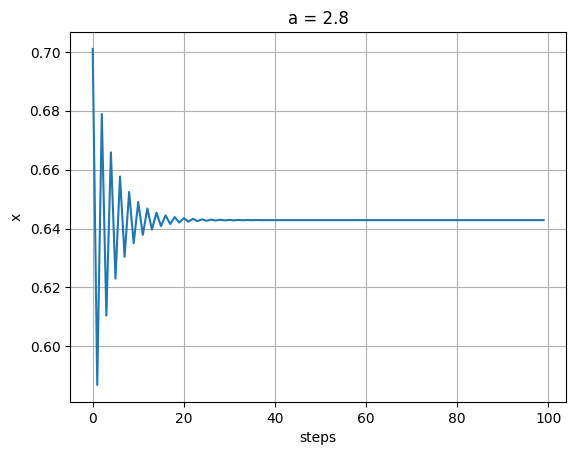

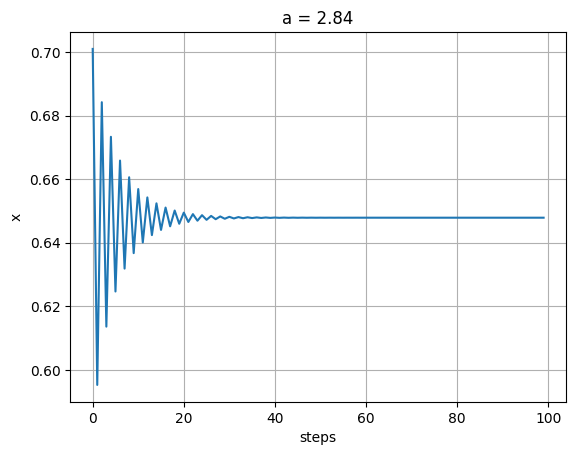

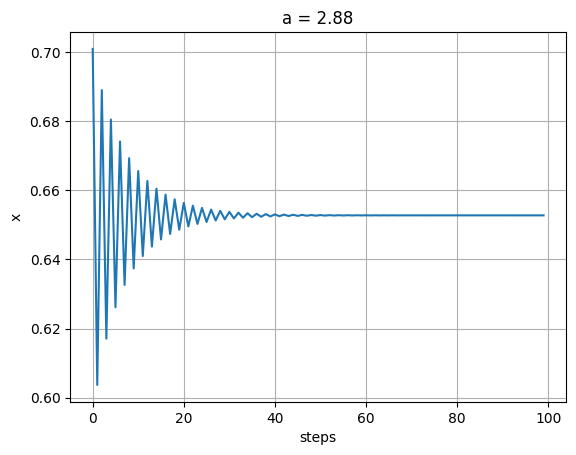

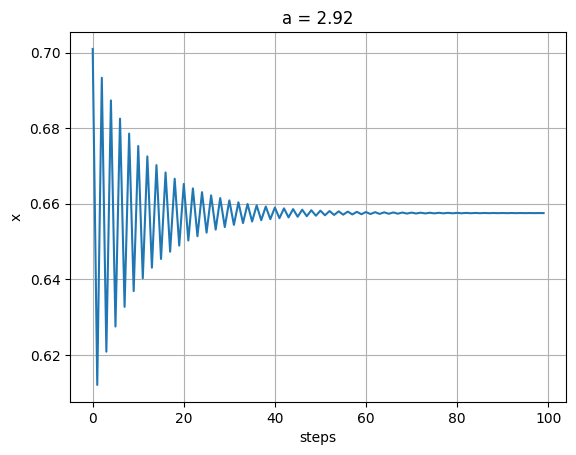

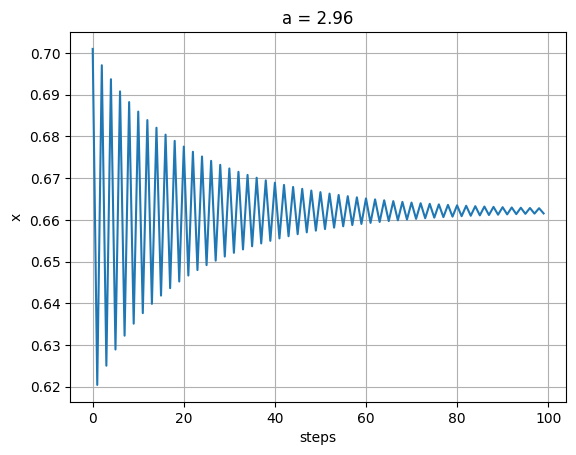

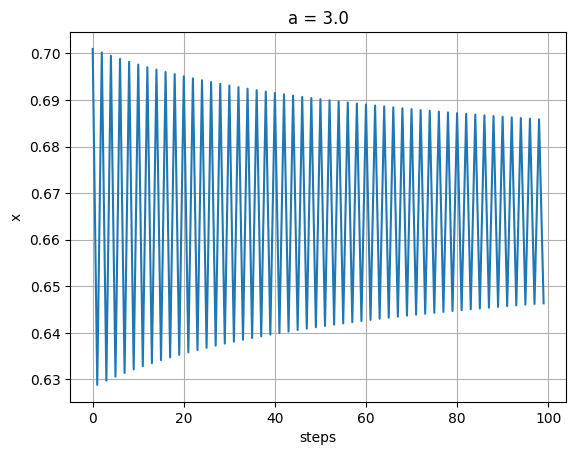

In [55]:
for a in np.arange(2.8, 3, 0.04):
    draw_process_chart(x0=X0, a=a, steps=100, process=process)

Постепенно способность стабилизироваться теряется

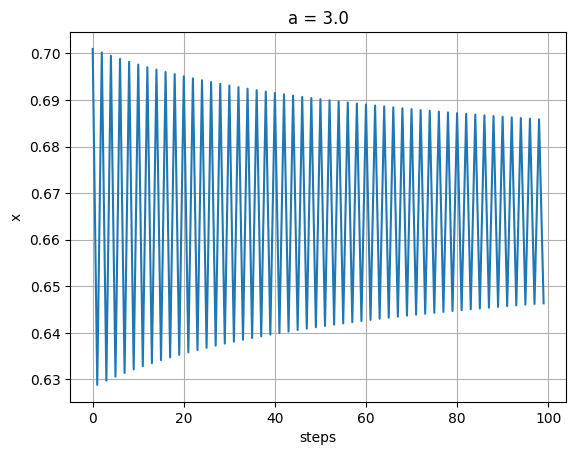

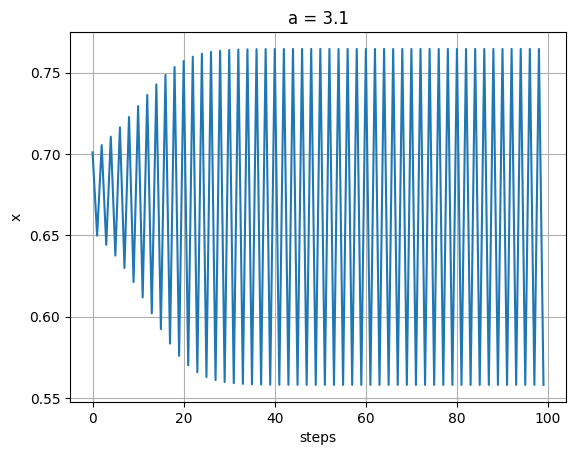

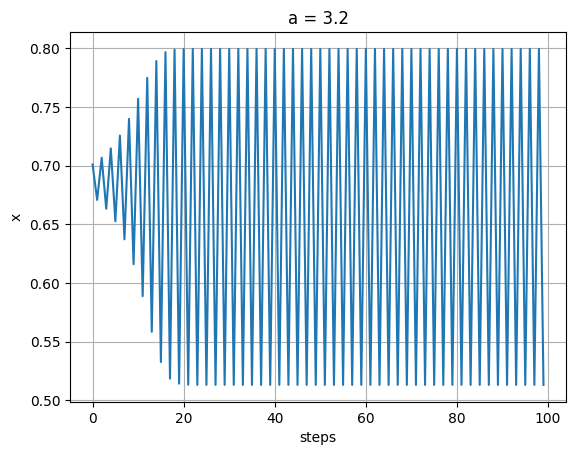

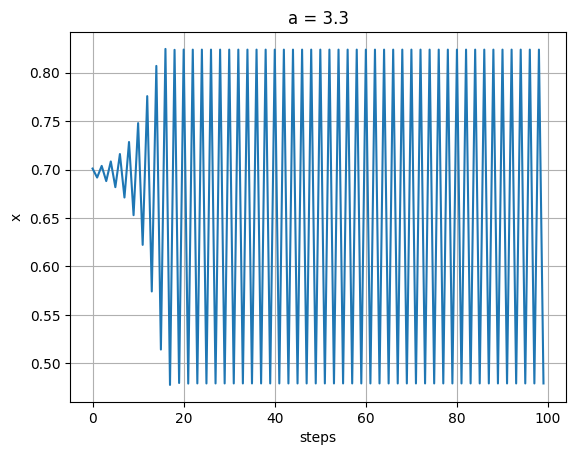

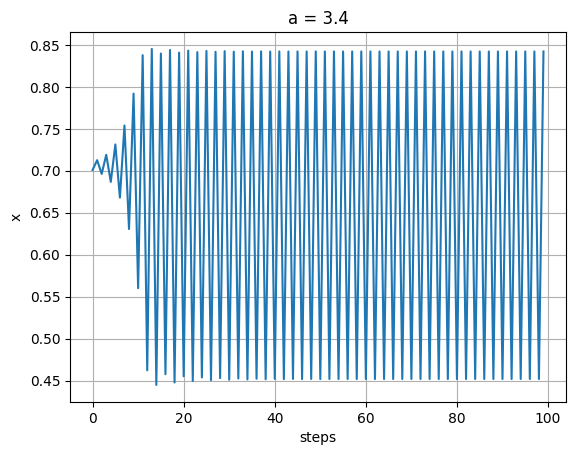

In [56]:
for a in np.arange(3, 3.5, 0.1):
    draw_process_chart(x0=X0, a=a, steps=100, process=process)

Происходит странное - вместо того, что бы сойтись к определенному значению, процесс начинает "*гулять*" между двумя.


In [57]:
print_process(x0=X0, a=3.4, steps=100, process=process)

0.70098 ➔ 0.71267 ➔ 0.69623 ➔ 0.71908 ➔ 0.68681 ➔ 0.73134 ➔ 0.66804 ➔ 0.754 ➔ 0.63065 ➔ 0.79196 ➔ 0.56017 ➔ 0.83769 ➔ 0.46228 ➔ 0.84516 ➔ 0.44493 ➔ 0.83969 ➔ 0.45768 ➔ 0.84391 ➔ 0.44787 ➔ 0.84076 ➔ 0.4552 ➔ 0.84318 ➔ 0.44958 ➔ 0.84136 ➔ 0.45382 ➔ 0.84275 ➔ 0.45058 ➔ 0.8417 ➔ 0.45303 ➔ 0.8425 ➔ 0.45116 ➔ 0.84189 ➔ 0.45258 ➔ 0.84235 ➔ 0.4515 ➔ 0.842 ➔ 0.45232 ➔ 0.84227 ➔ 0.4517 ➔ 0.84207 ➔ 0.45217 ➔ 0.84222 ➔ 0.45181 ➔ 0.8421 ➔ 0.45208 ➔ 0.84219 ➔ 0.45187 ➔ 0.84213 ➔ 0.45203 ➔ 0.84218 ➔ 0.45191 ➔ 0.84214 ➔ 0.452 ➔ 0.84217 ➔ 0.45193 ➔ 0.84214 ➔ 0.45199 ➔ 0.84216 ➔ 0.45195 ➔ 0.84215 ➔ 0.45198 ➔ 0.84216 ➔ 0.45195 ➔ 0.84215 ➔ 0.45197 ➔ 0.84216 ➔ 0.45196 ➔ 0.84215 ➔ 0.45197 ➔ 0.84216 ➔ 0.45196 ➔ 0.84215 ➔ 0.45197 ➔ 0.84216 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 0.45196 ➔ 0.84215 ➔ 

Участок от 3.4 до 4 мы будем исследовать с меньшим шагом между a

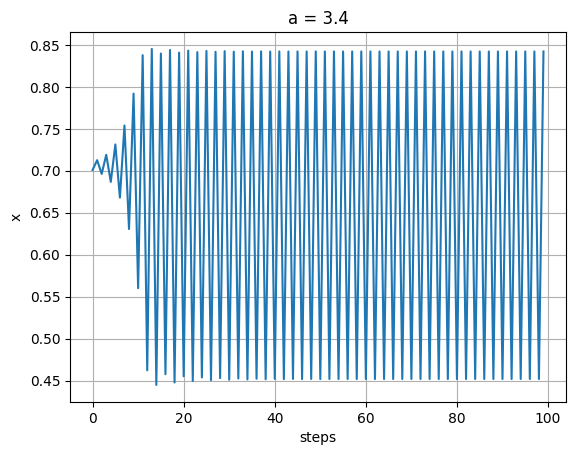

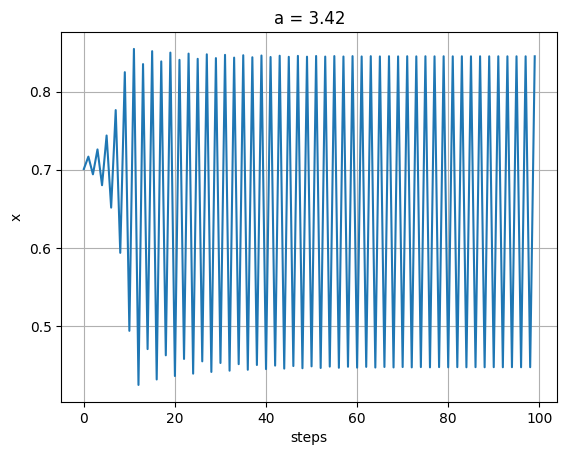

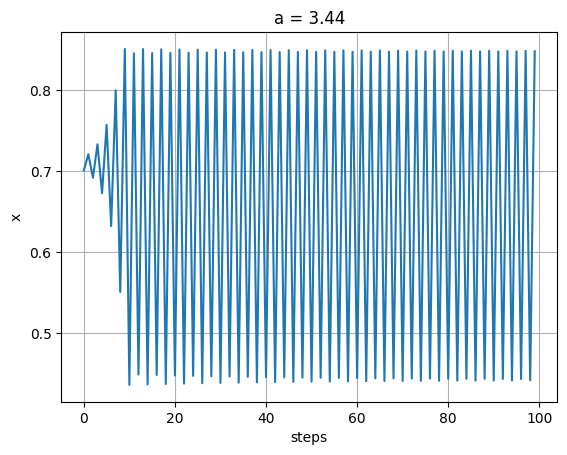

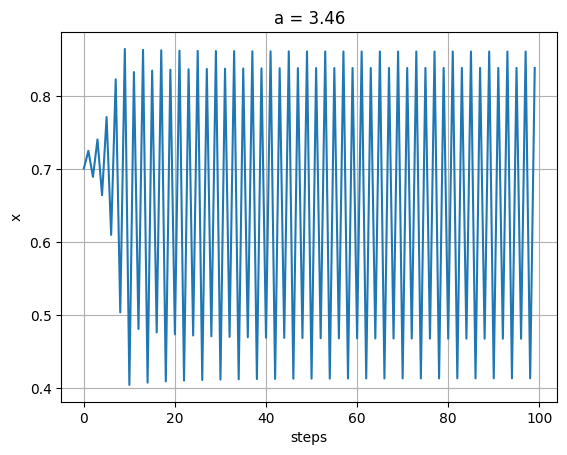

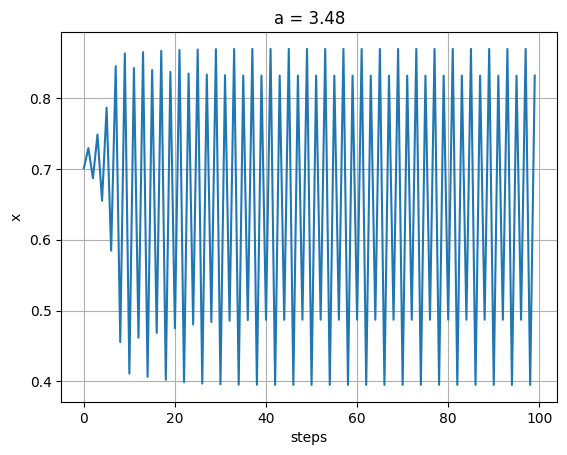

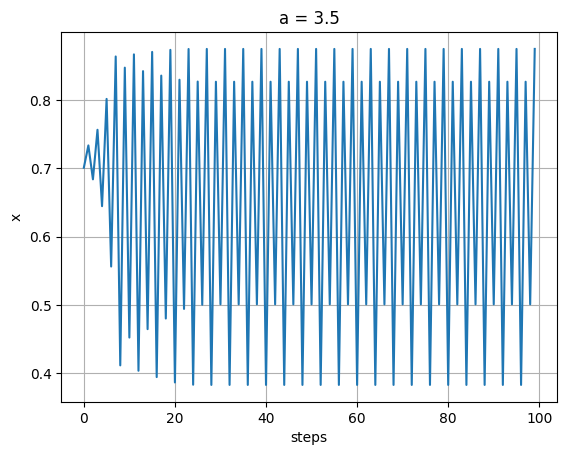

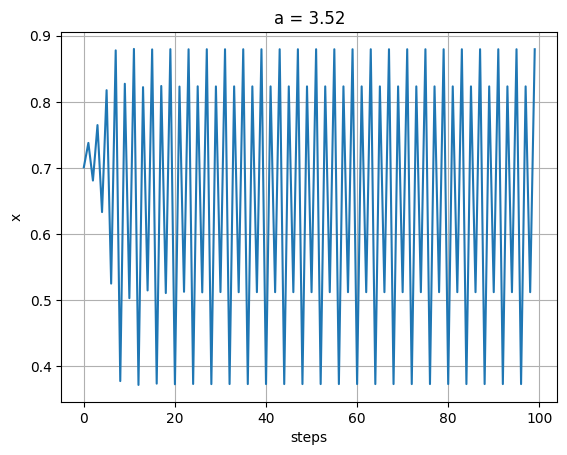

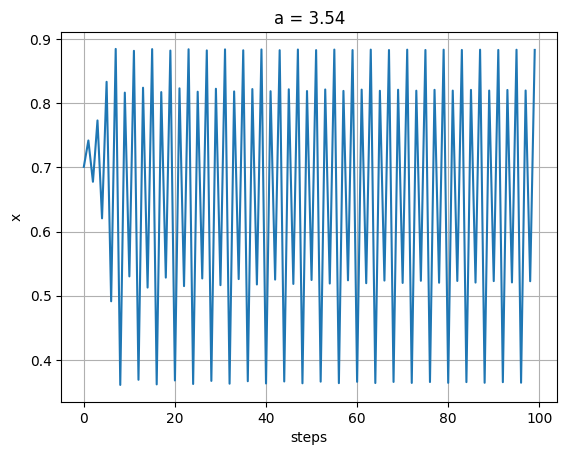

In [58]:
for a in np.arange(3.4, 3.54, 0.02):
    draw_process_chart(x0=X0, a=a, steps=100, process=process)

Наш процесс опять раздвоило. Теперь он прыгает между 4 значениями.

Для дальнейшего исследования, мы будем моделировать *в два раза больше* лет, но рисовать на графике *каждый второй год*

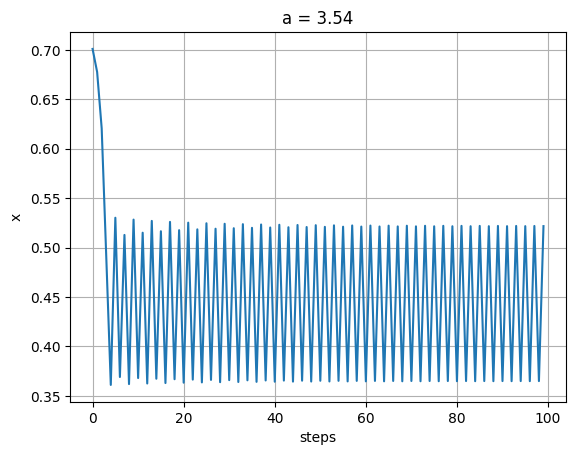

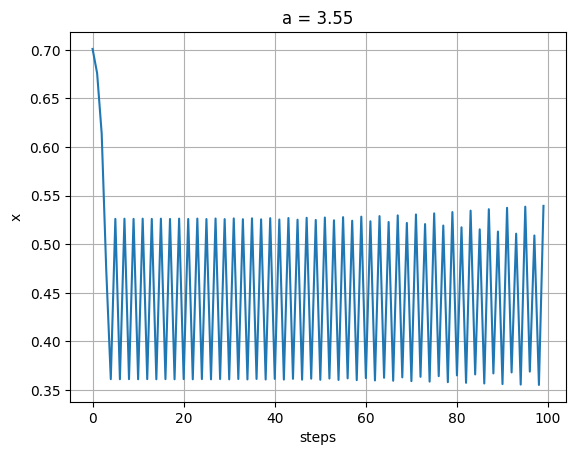

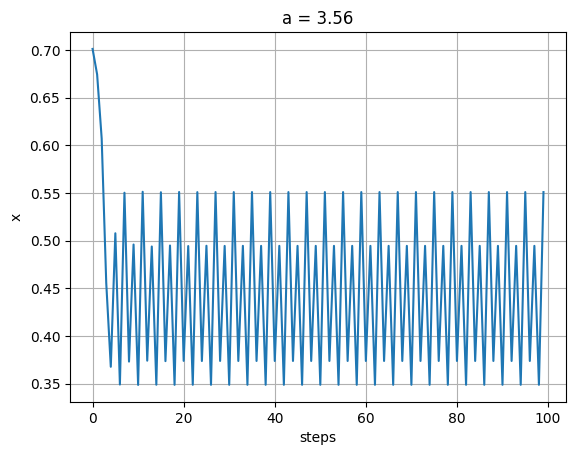

In [59]:
for a in np.arange(3.54, 3.56, 0.01):
    draw_process_chart(x0=X0, a=a, steps=200, process=process, every=2)

Как видно, значение *опять раздвоило*. Мы рисовали каждый второй год, а истинная картина при a=3.56 выглядит так:

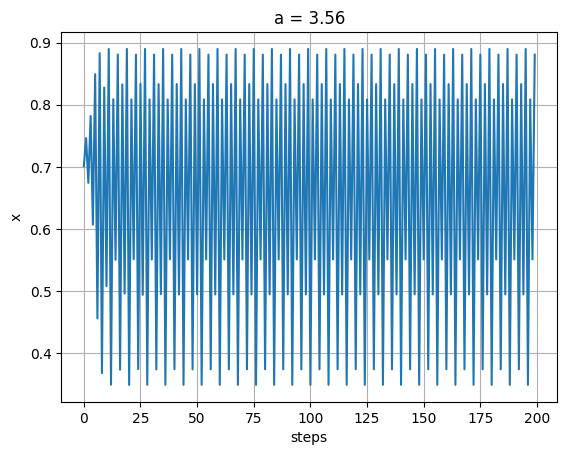

In [60]:
draw_process_chart(x0=X0, a=3.56, steps=200, process=process)

Будем рисовать каждый восьмой год:

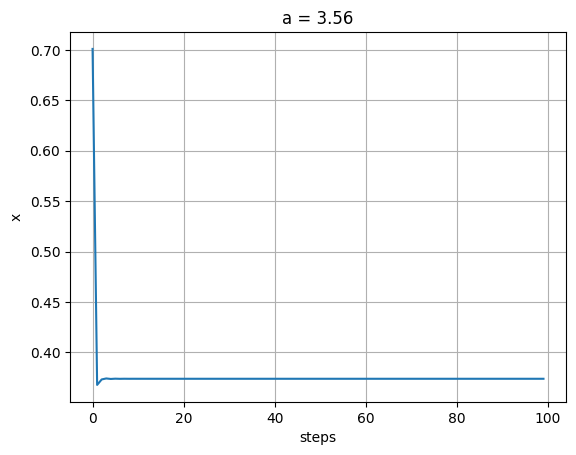

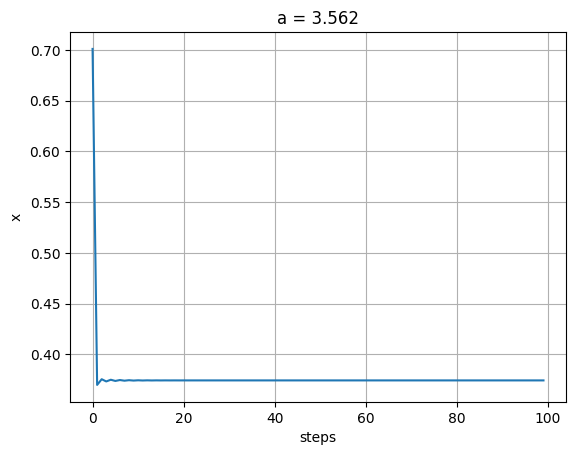

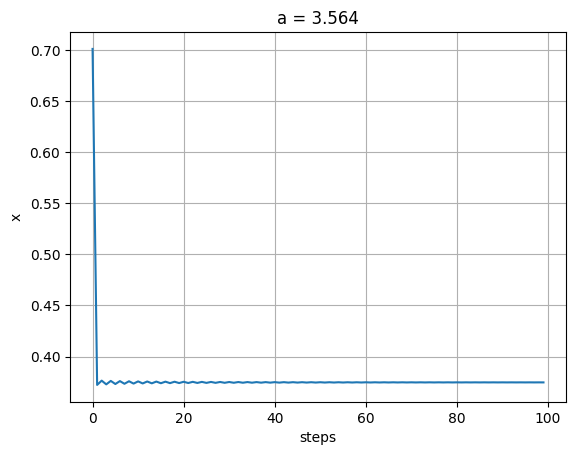

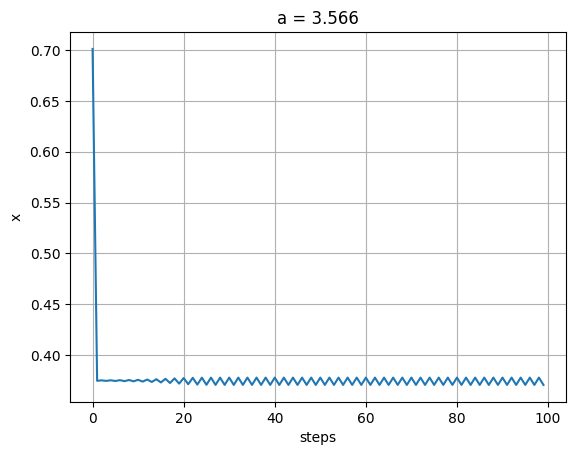

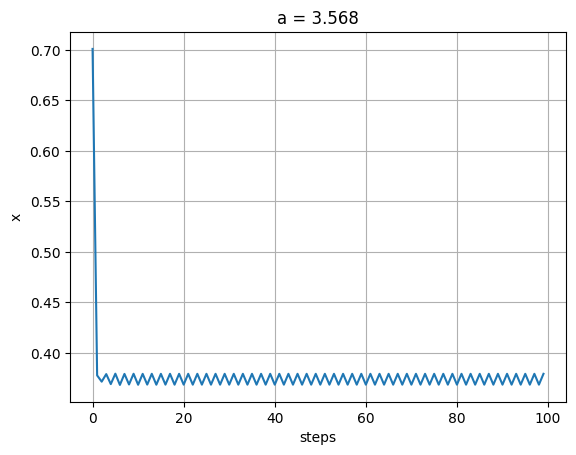

In [61]:
for a in np.arange(3.56, 3.57, 0.002):
    draw_process_chart(x0=X0, a=a, steps=800, process=process, every=8)

Можно видеть, как периоды удваивались ещё раз, затем ещё раз. 

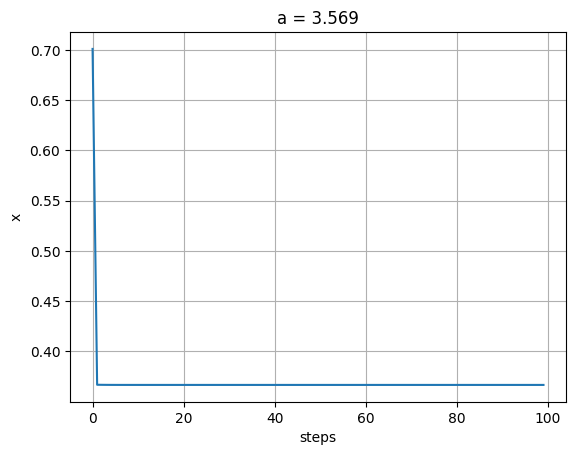

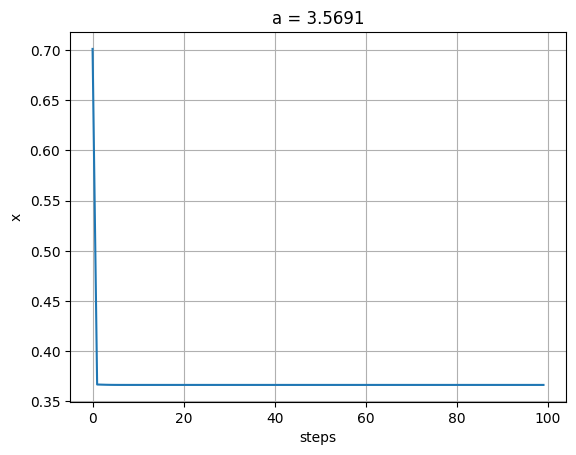

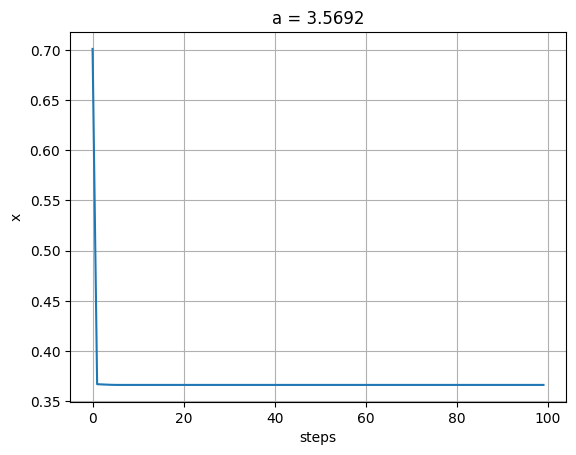

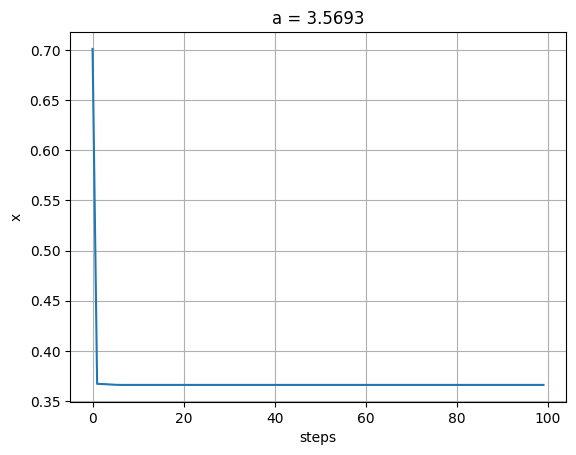

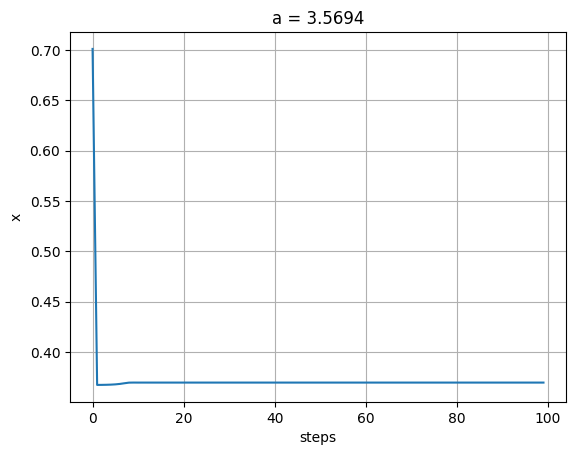

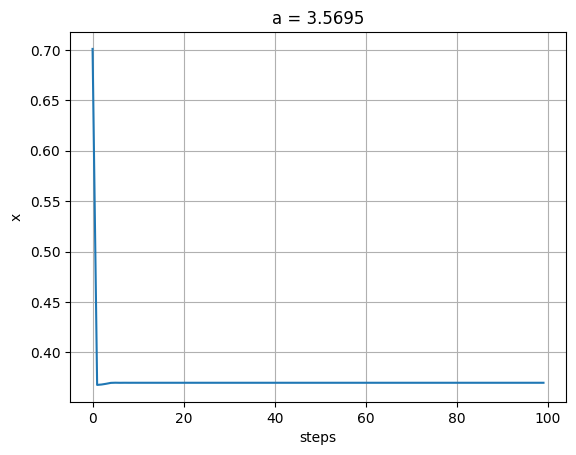

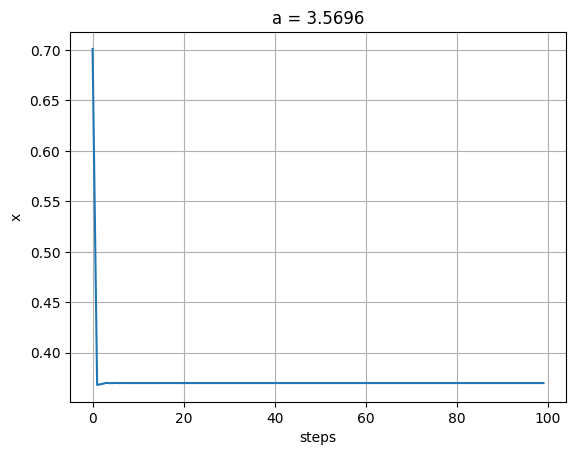

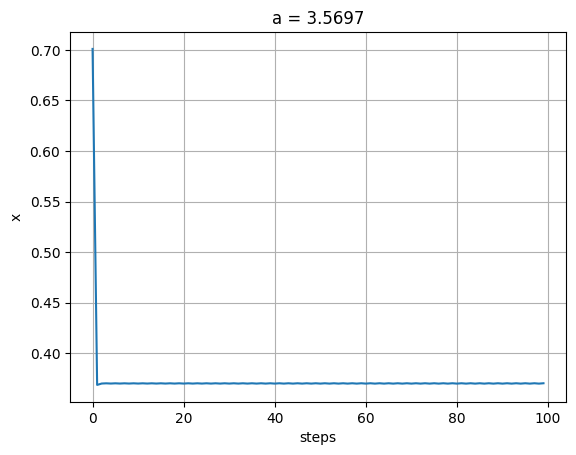

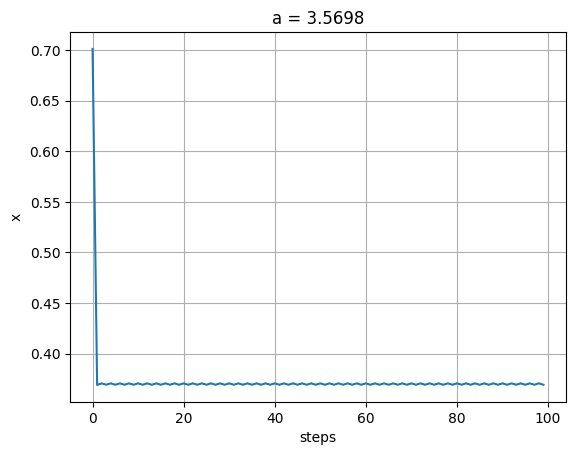

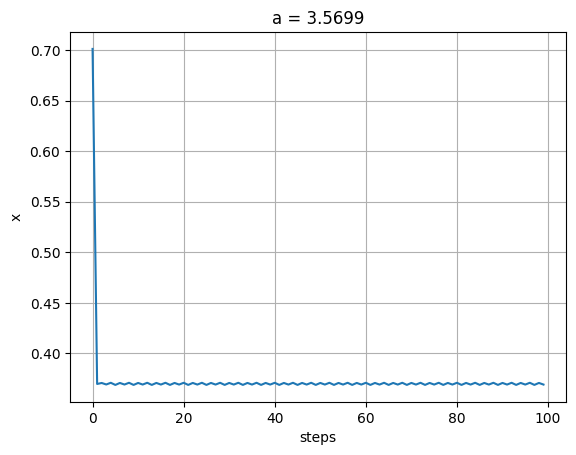

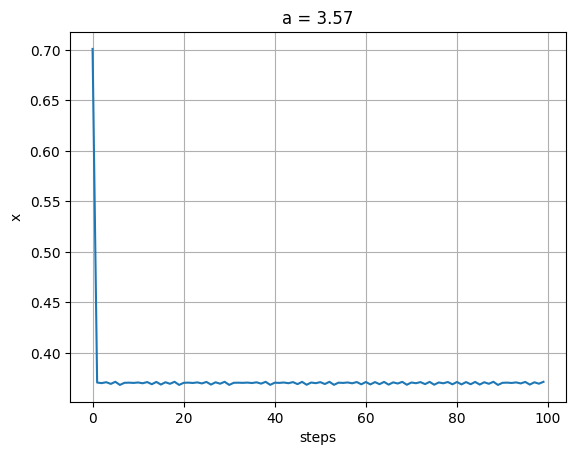

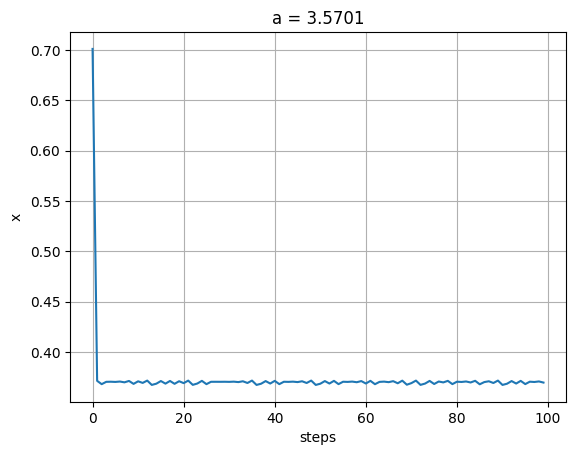

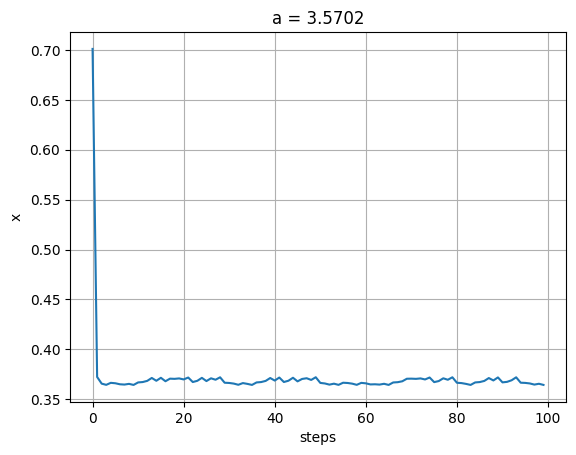

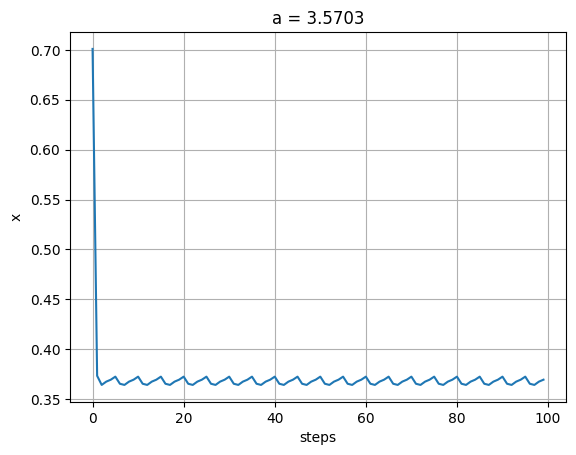

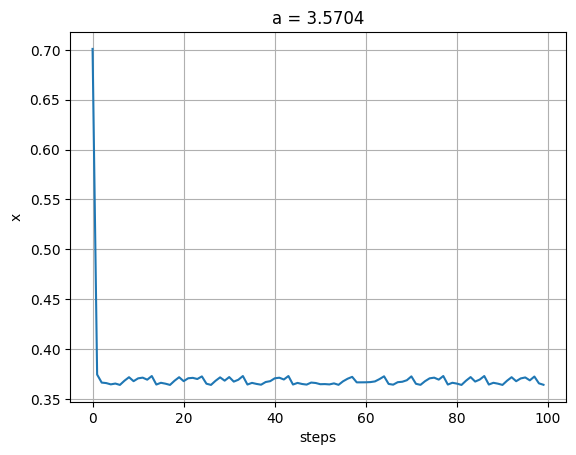

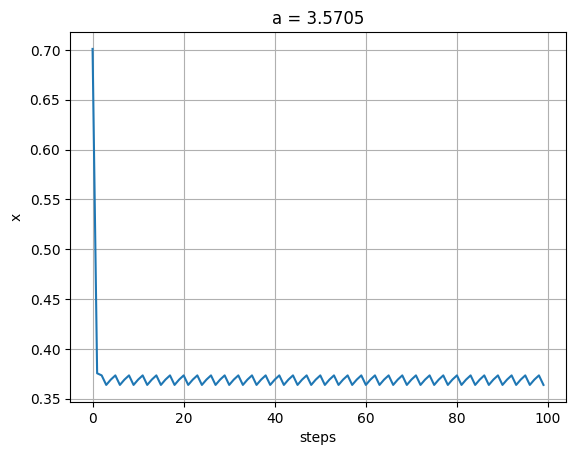

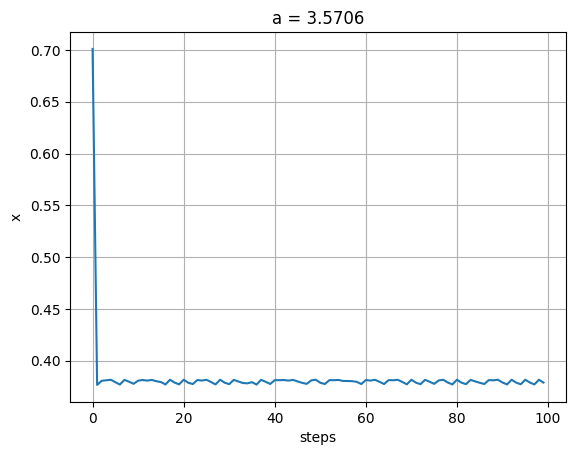

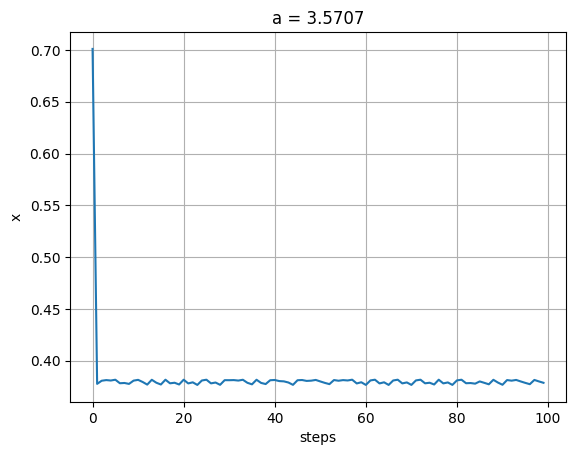

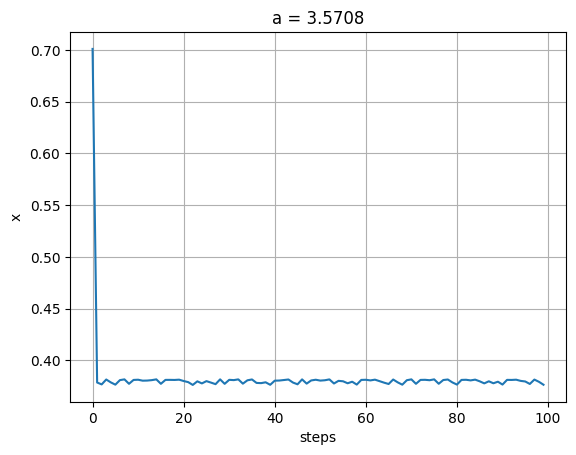

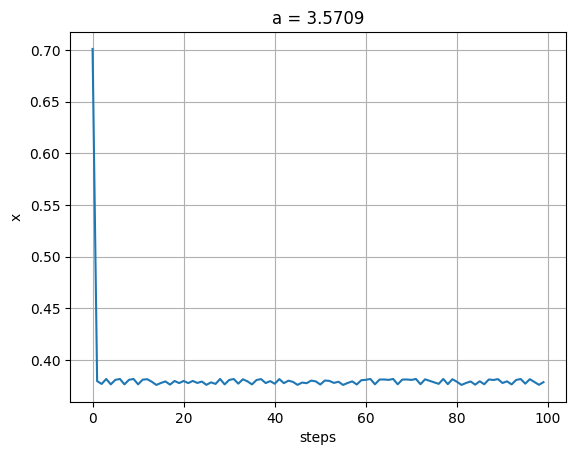

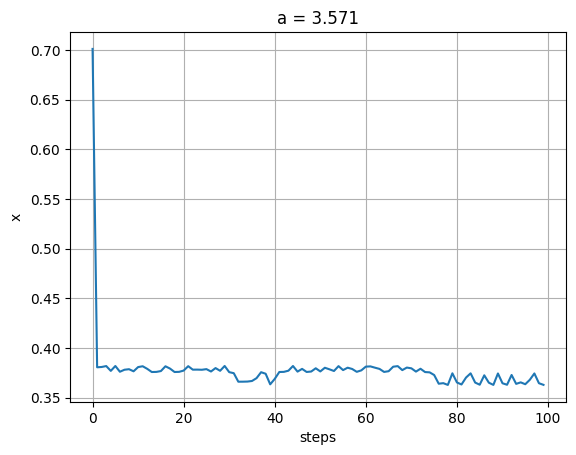

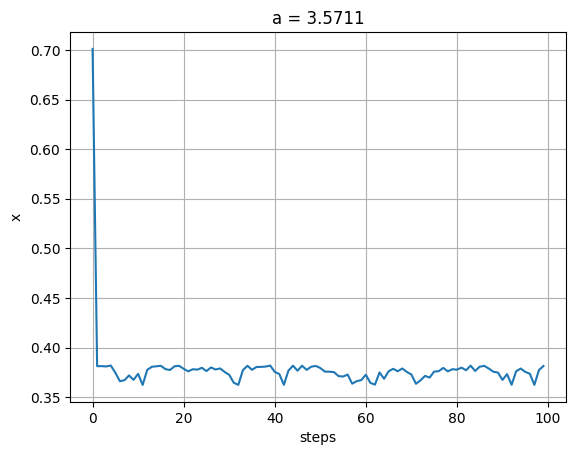

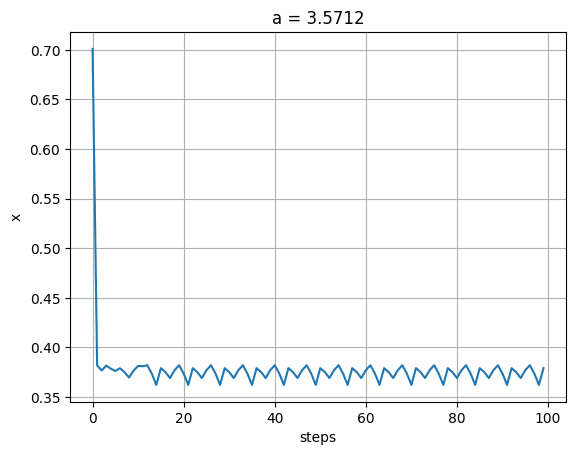

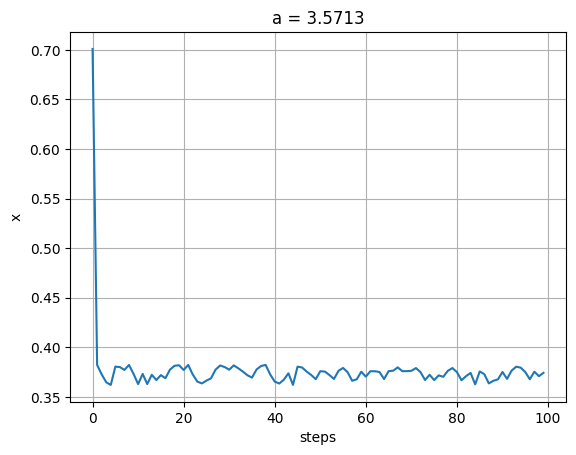

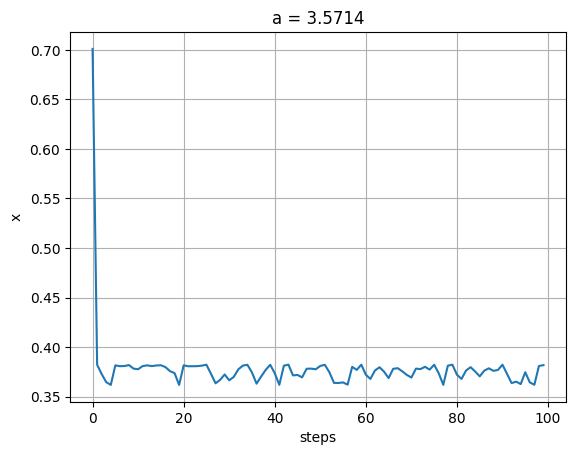

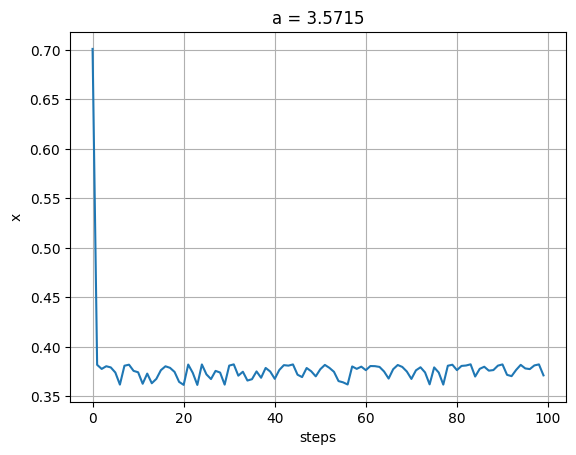

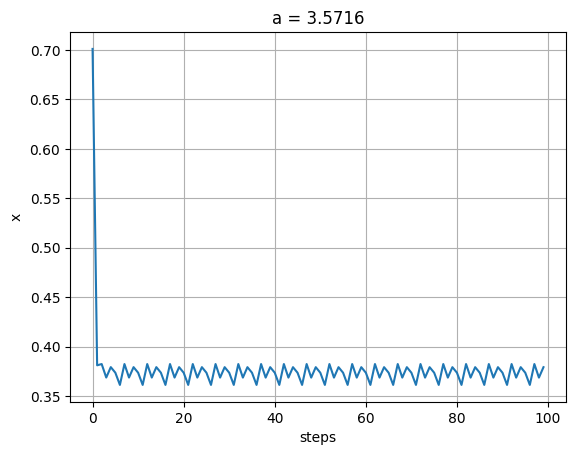

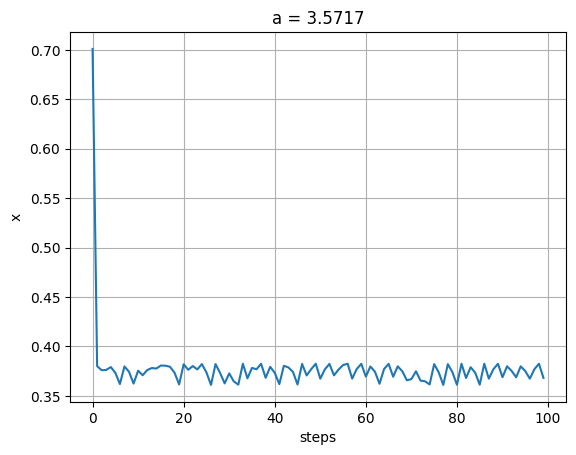

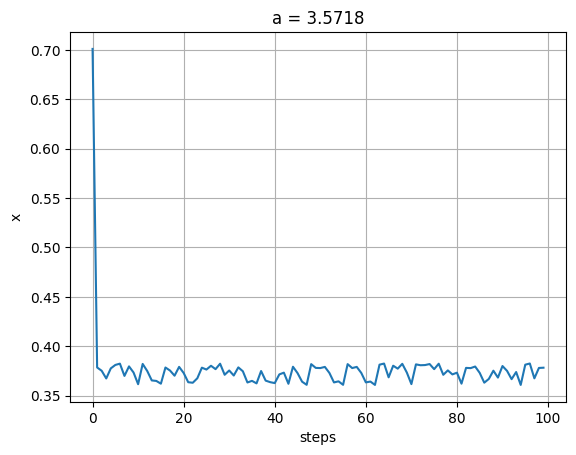

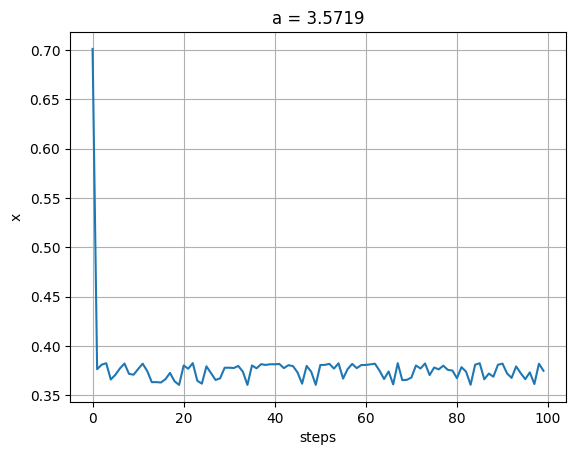

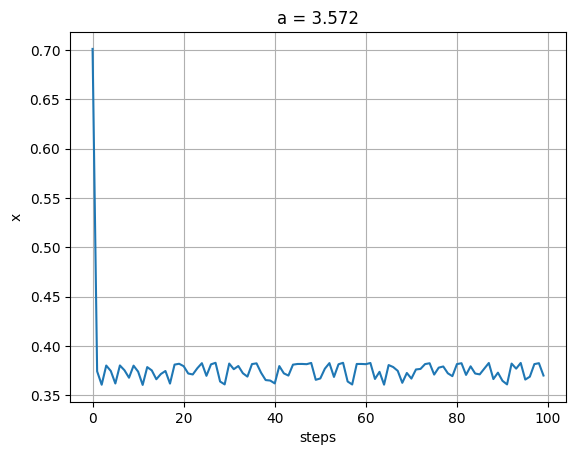

In [62]:
for a in np.arange(3.569, 3.572, 0.0001):
    draw_process_chart(x0=X0, a=a, steps=3200, process=process, every=32)

Видно, что в какой-то момент последовательность начинает разбалтывать, и это уже сложно обьяснить удвоением периода. Рассмотрим каждый 64 элемент с мелким шагом до 3.59:

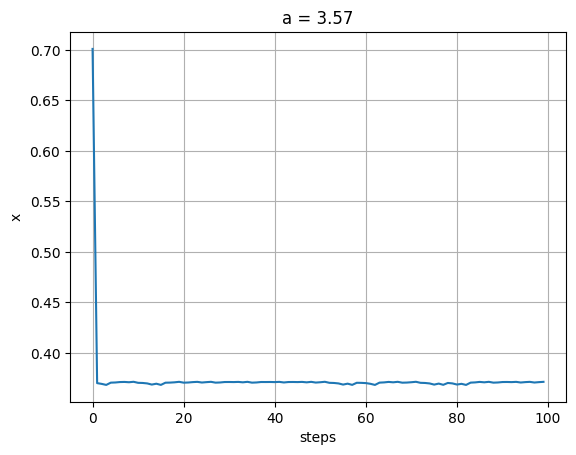

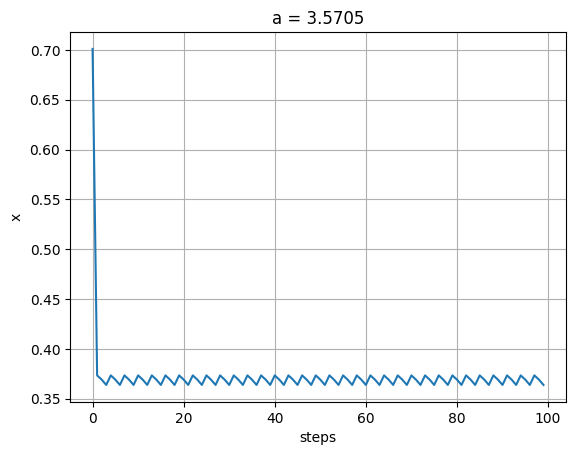

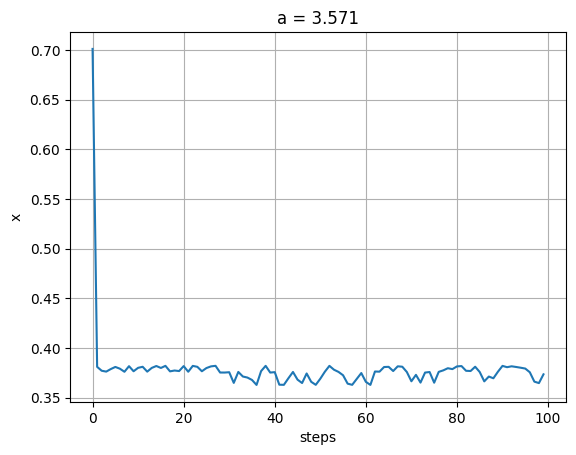

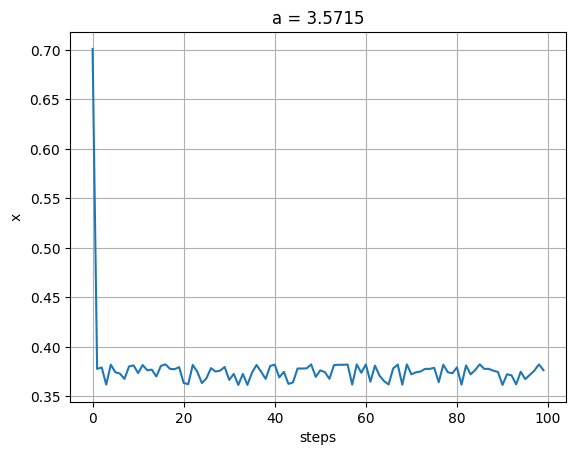

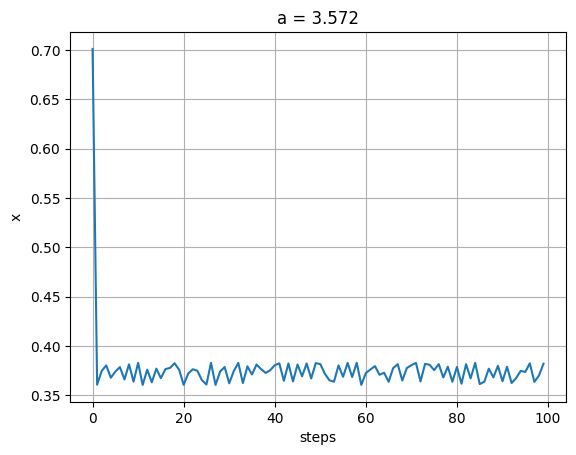

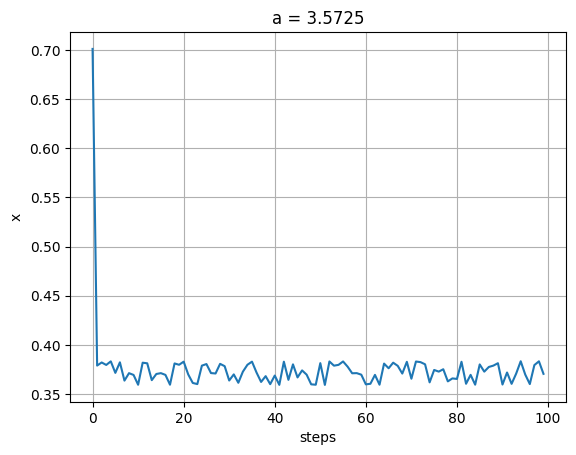

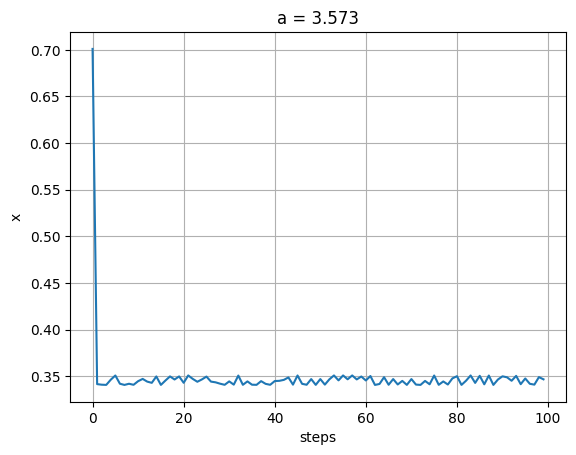

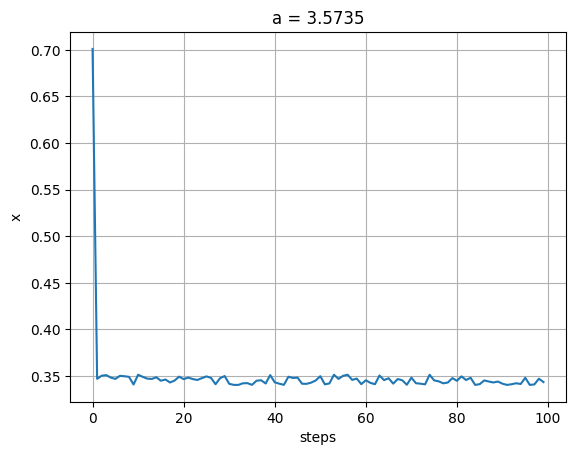

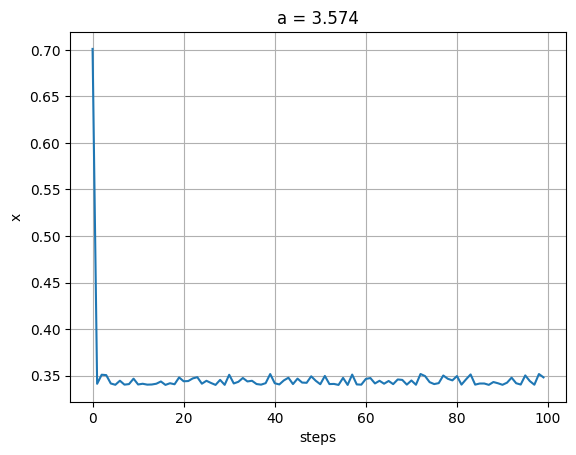

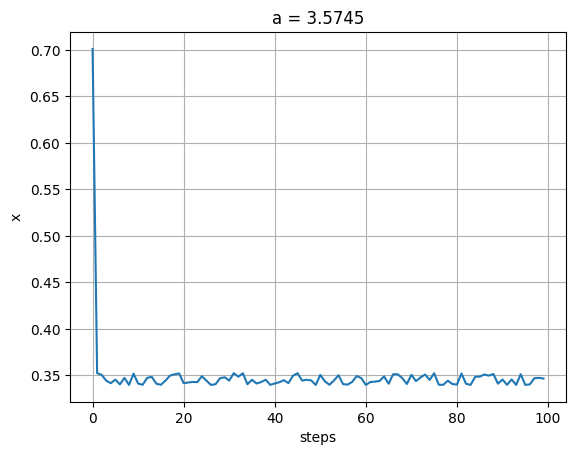

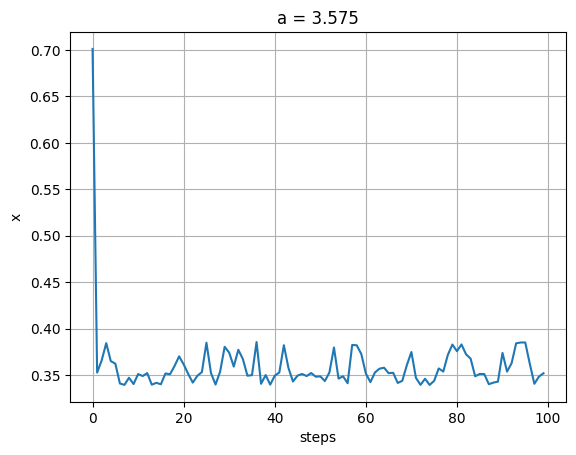

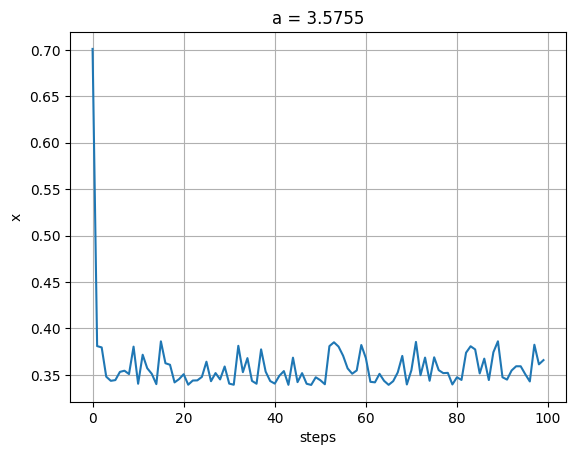

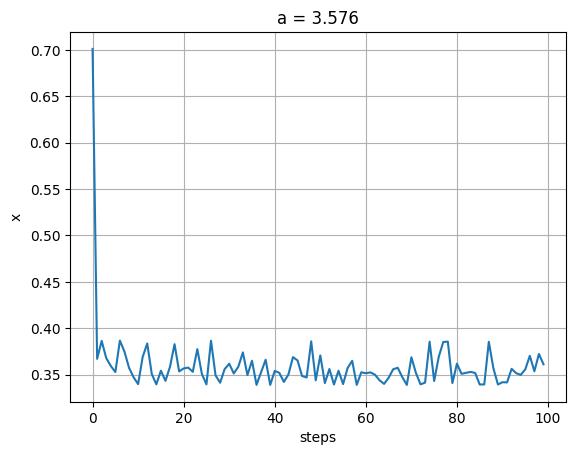

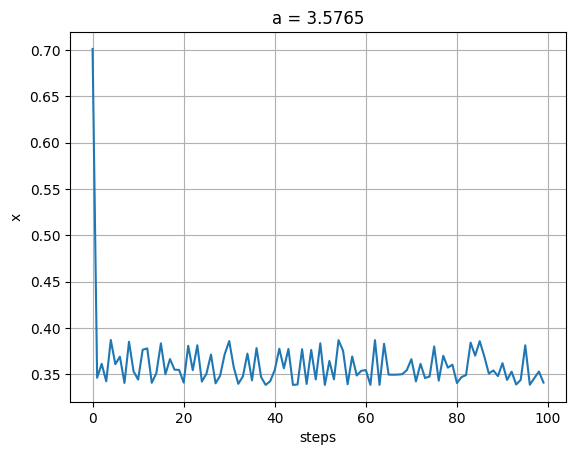

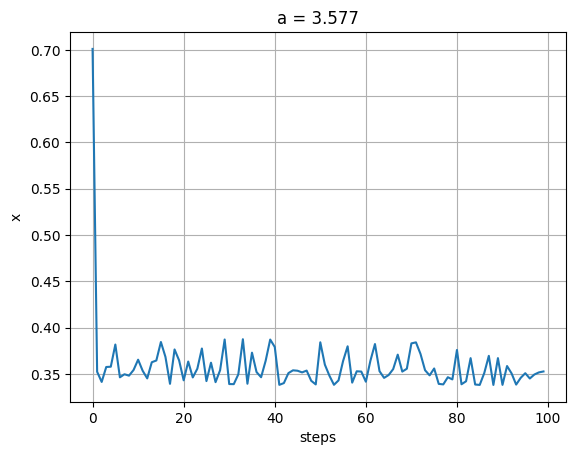

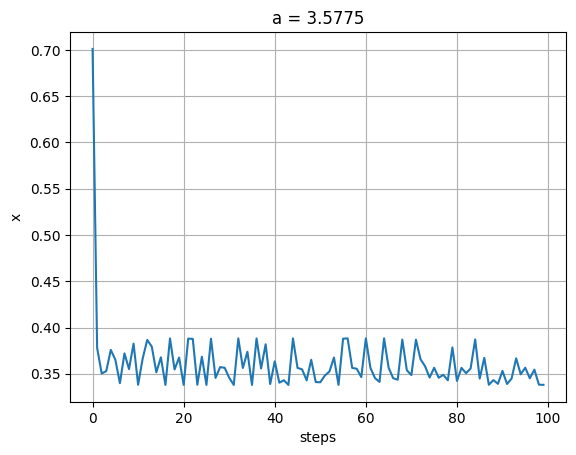

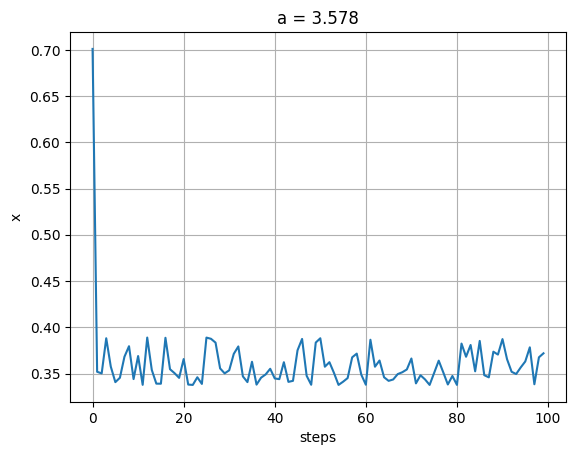

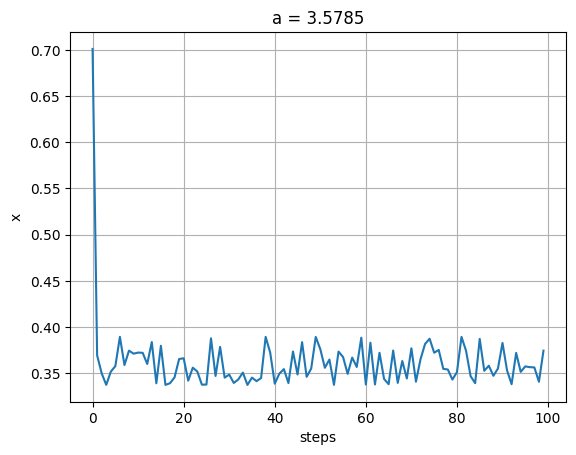

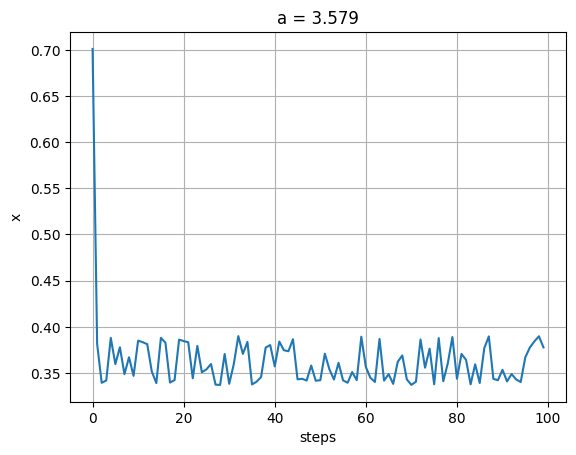

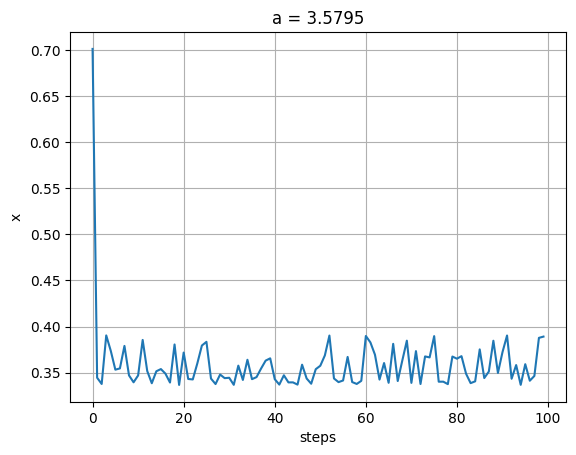

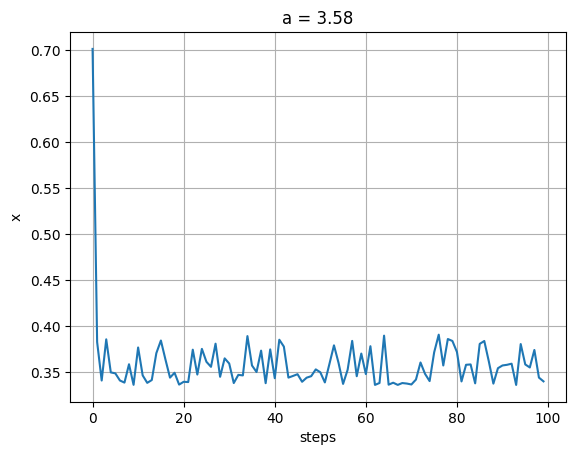

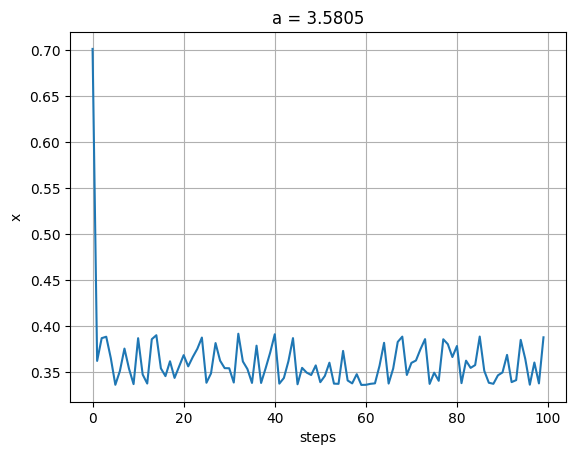

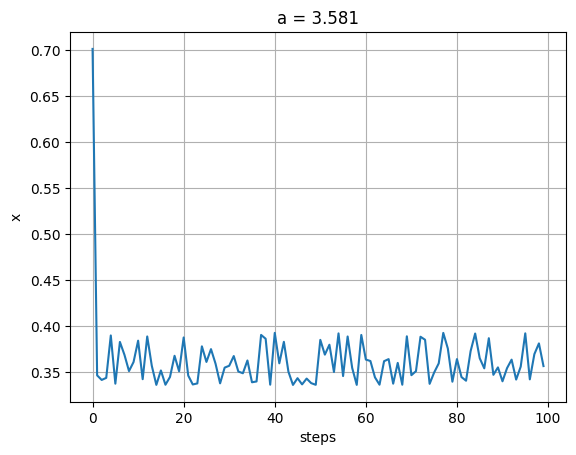

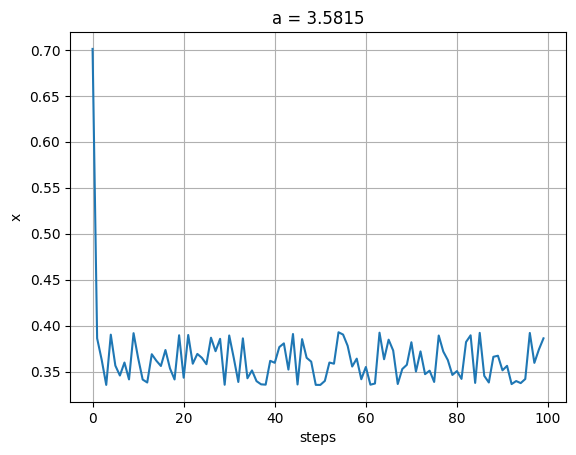

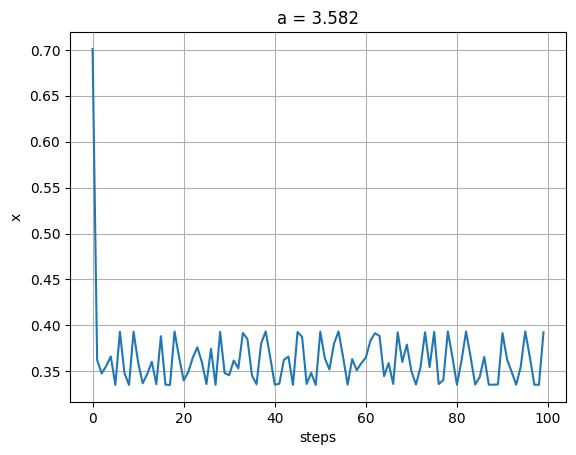

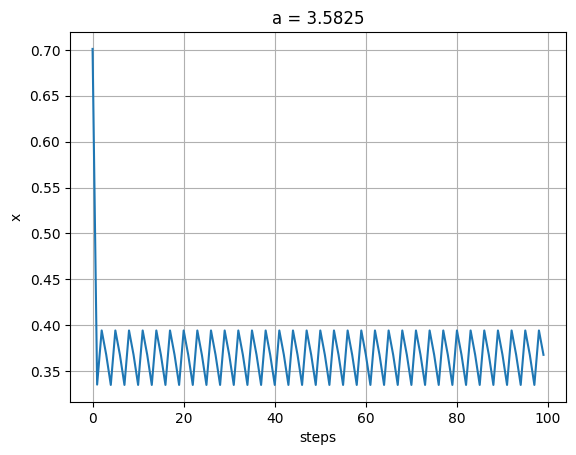

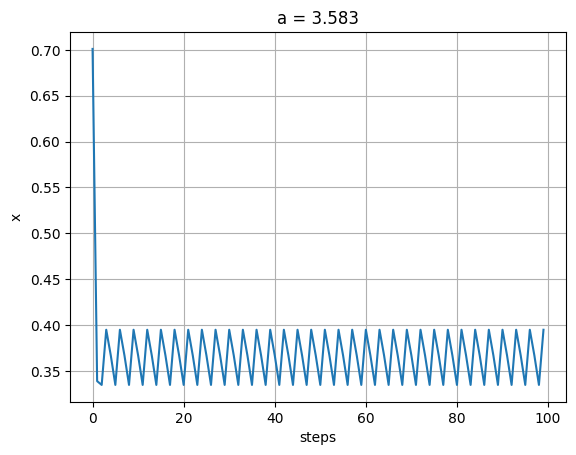

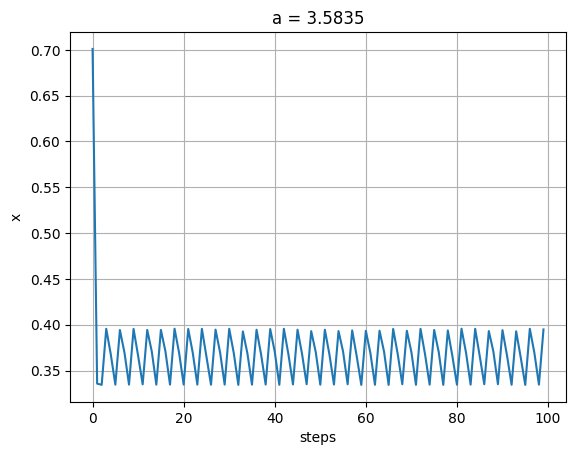

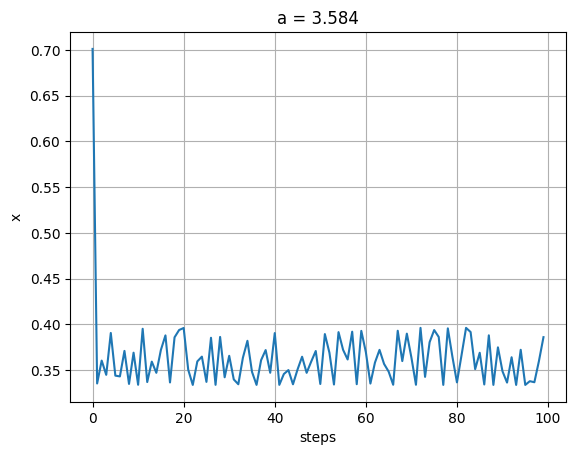

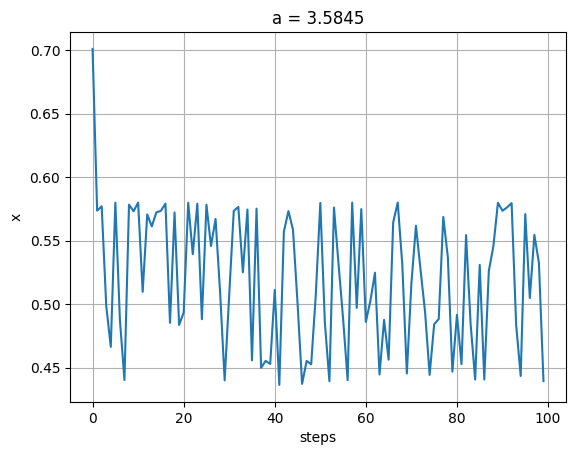

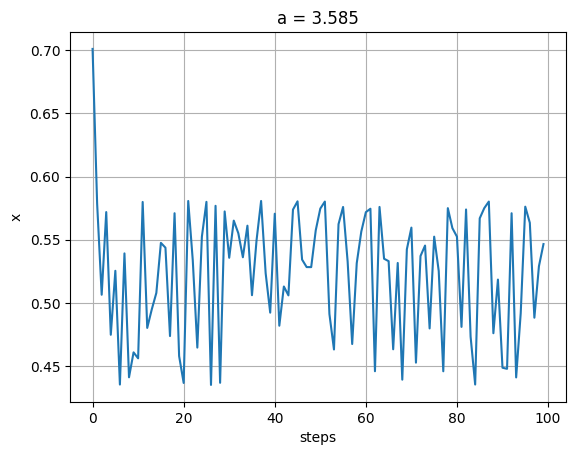

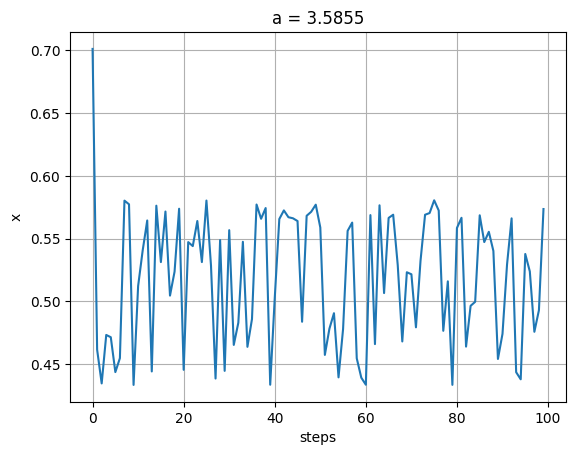

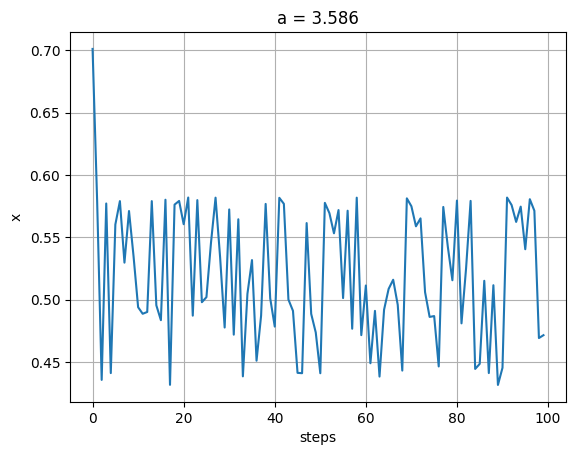

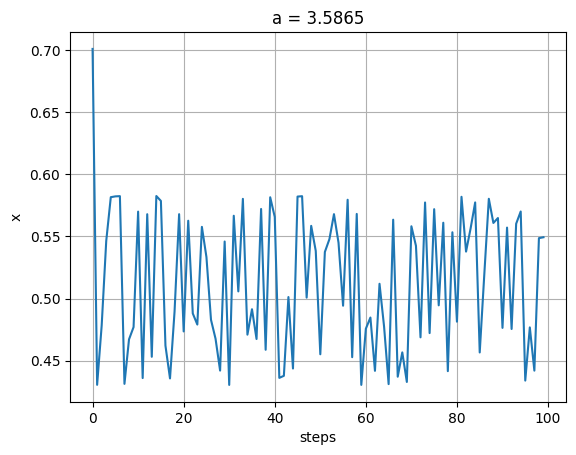

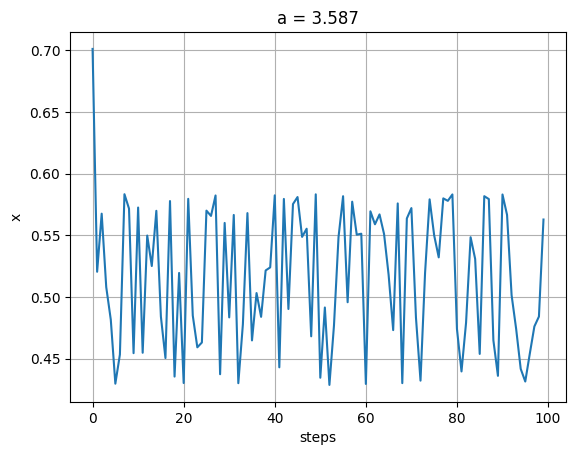

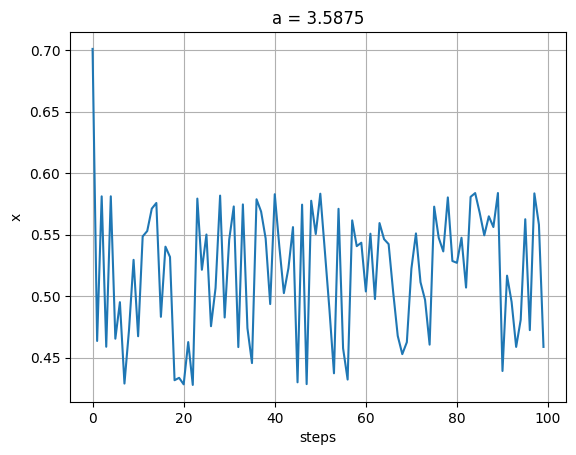

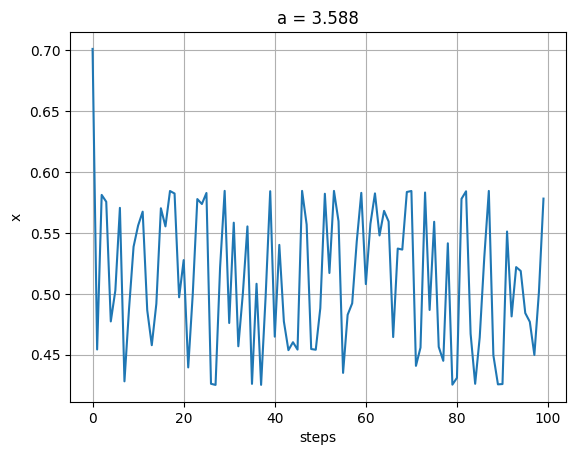

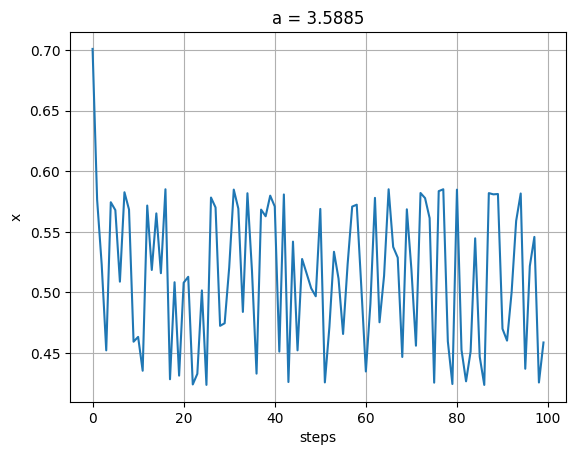

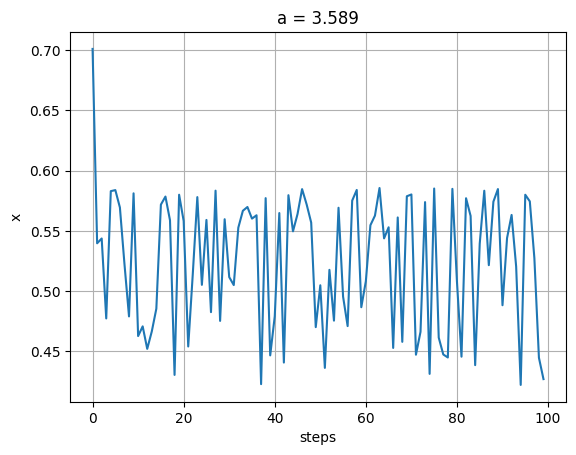

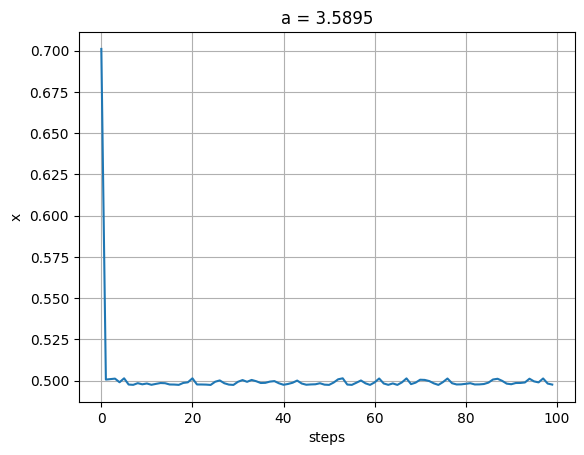

In [63]:
for a in np.arange(3.57, 3.5895, 0.0005):
    draw_process_chart(x0=X0, a=a, steps=6400, process=process, every=64)

Мы видим целую историю жизни процесса. Он стабилизируется, ловит период, после чего его разбалтывает. Опять ловит, и опять разбалтывает. Опять ловит..
При 3.5895 процесс чудом стабилизируется в одной позиции...

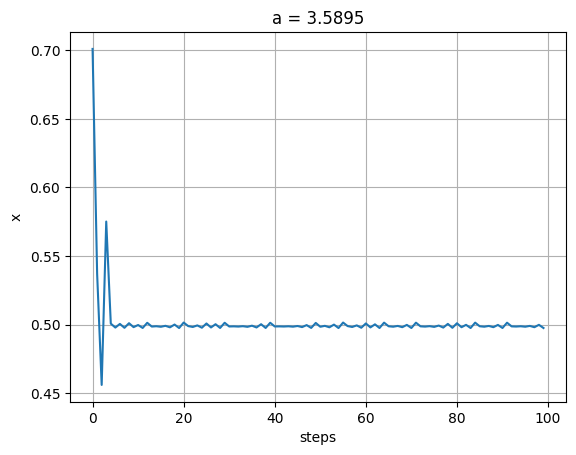

In [64]:
draw_process_chart(x0=X0, a=3.5895, steps=1600, process=process, every=16)

И его окончательно расколбашивает.

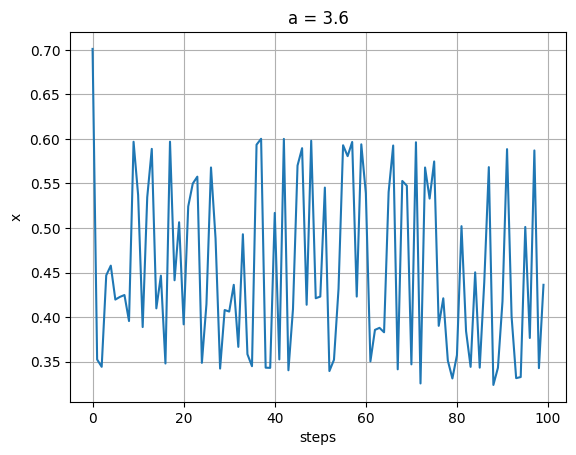

In [65]:
draw_process_chart(x0=X0, a=3.6, steps=6400, process=process, every=64)

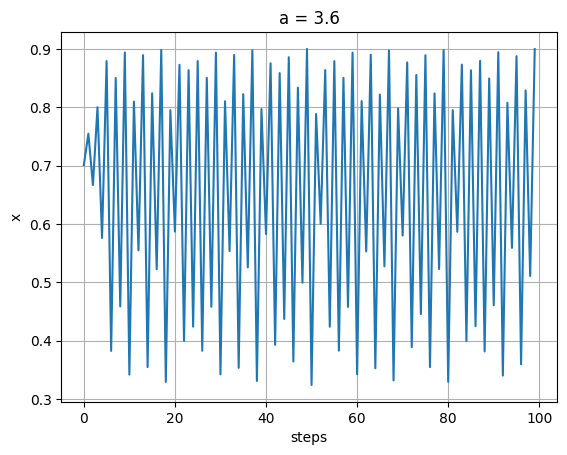

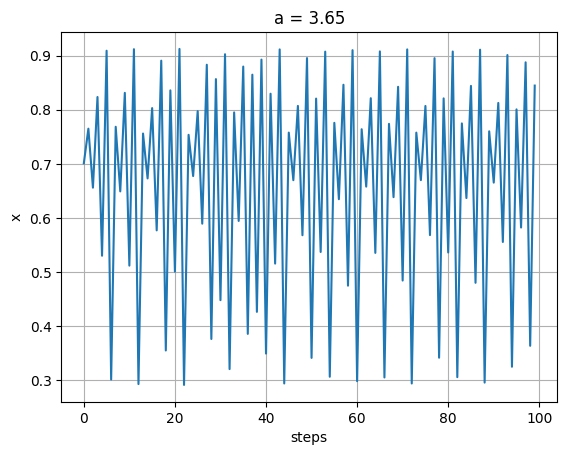

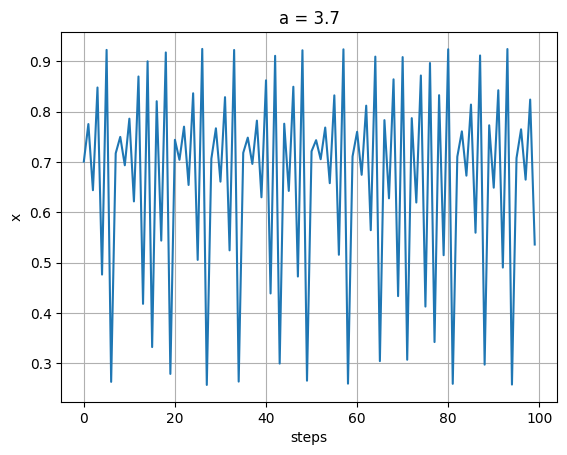

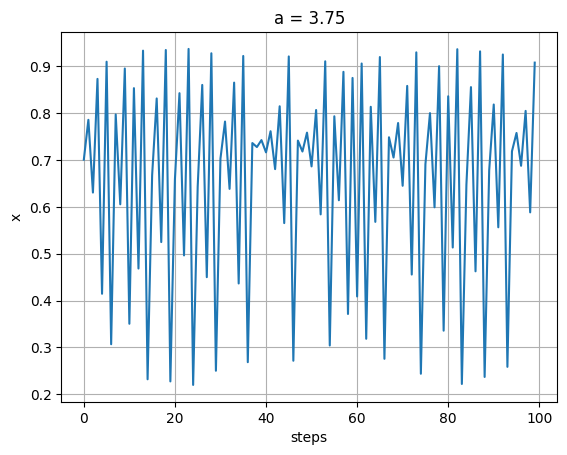

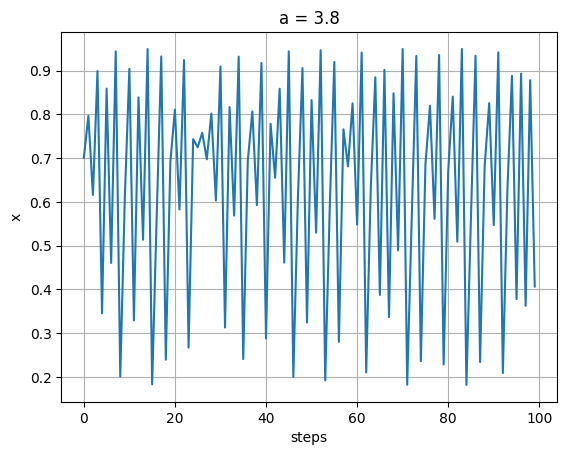

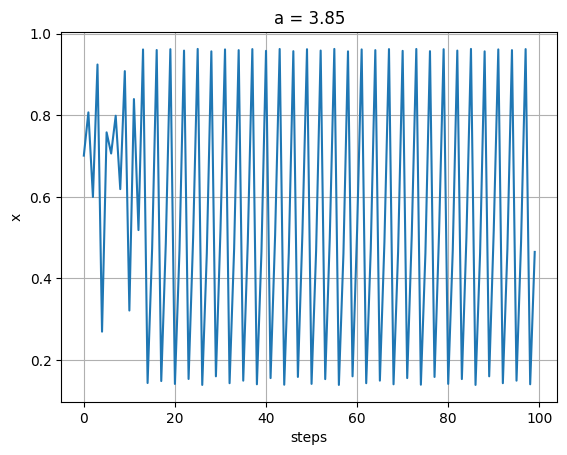

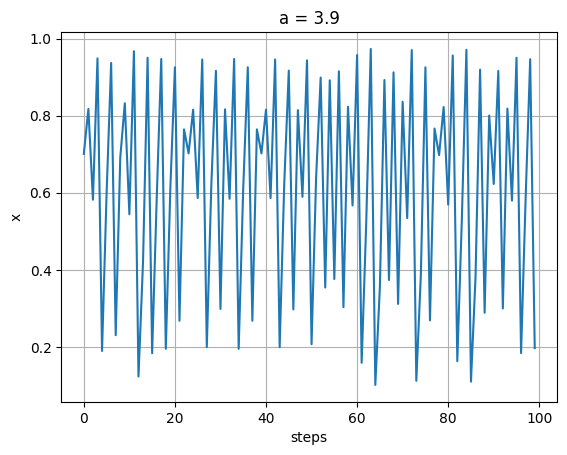

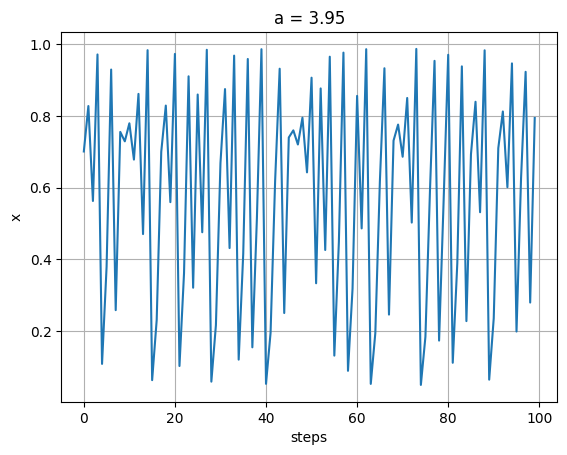

In [66]:
for a in np.arange(3.6, 4, 0.05):
    draw_process_chart(x0=X0, a=a, steps=100, process=process)


А что будет после 4? Рассмотрим эволюцию процесса:

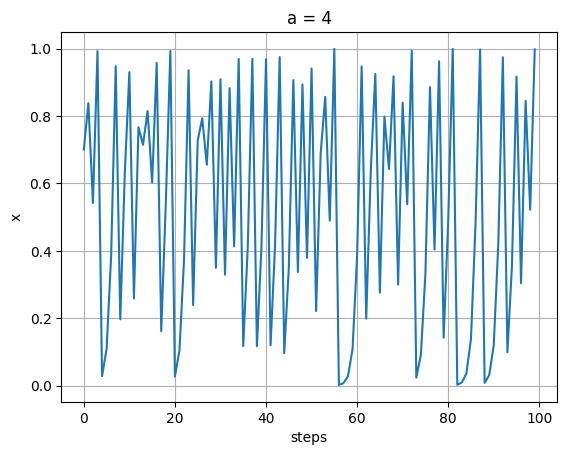

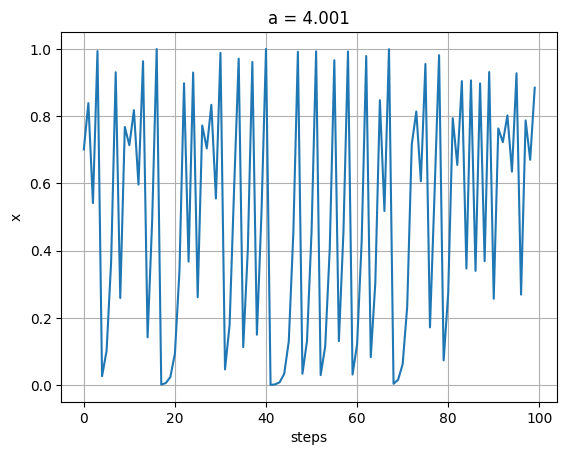

In [67]:
draw_process_chart(x0=X0, a=4, steps=100, process=process)
draw_process_chart(x0=X0, a=4.001, steps=100, process=process)

Как видно, процесс после 4 вылетает за разрешенный интервал [0,1] и дальше улетает в бесконечность.
(при некоторых x0 не улетает, вам может повезти)

## Глава вторая. Орбитальное движение

Введем функцию orbit(process, a, x0), вычисляющую *стабильную орбиту* процесса при разных значениях а. (при произвольном x0 от 0 до 1)

Орбитой называются те точки, рядом с которыми будут проходить значения функции по истечении достаточного для стабилизации числа шагов. Мы видили, что:

orbit(process, 2, 0.5) = {0.5}

orbit(process, 3.4, 0.5) = {0.84215, 0.45196} , так как там значения болтаются между двумя точками

а стабильной орбита для 3.8 вовсе не существует (как вариант, она включает бесконечное множество точек)

In [68]:
def orbit(process, a, x0):
    SKIP = 128
    STEPS = 128

    EPS = 0.001

    x = x0

    # пропускаем первые SKIP шага, что бы орбита стабилизировалась
    for _ in range(SKIP):
        x = process(x, a)
        if abs(x) > 1e10:
            break

    # Собираем следующие STEPS шагов для анализа 
    values = []

    for _ in range(STEPS):
        x = abs(process(x, a))
        values.append(x)
        if abs(x) > 1e10:
            break


    # Сортируем их и разбиваем на группы

    values.sort()
    
    groups = [[]]

    for x in values:
        group = groups[-1]
        if len(groups[-1]) == 0:
            group.append(x)
            continue

        prev = group[-1]
        if x - prev < EPS:
            group.append(x)
            continue

        groups.append([x])

    return [np.mean(group) for group in groups]    
    

In [69]:
for a in np.arange(2, 4, 0.1):
    o = orbit(process, a, 0.5)
    print(round(a,5), len(o), o)

2.0 1 [0.5]
2.1 1 [0.5238095238095238]
2.2 1 [0.5454545454545455]
2.3 1 [0.5652173913043478]
2.4 1 [0.5833333333333336]
2.5 1 [0.5999999999999999]
2.6 1 [0.6153846153846152]
2.7 1 [0.6296296296296298]
2.8 1 [0.642857142857143]
2.9 1 [0.6551724141384957]
3.0 2 [0.6494628632076138, 0.683057521702974]
3.1 2 [0.5580141252026952, 0.7645665199585948]
3.2 2 [0.5130445095326294, 0.7994554904673705]
3.3 2 [0.47942701982423375, 0.8236032832060693]
3.4 2 [0.451963247622239, 0.842154399434353]
3.5 4 [0.38281968301732344, 0.5008842103072184, 0.8269407065914385, 0.8749972636024644]
3.6 87 [0.3244166643157713, 0.32733086175066867, 0.3287180258370148, 0.33023309667560435, 0.33329811612828014, 0.3377282431723987, 0.3414301599495897, 0.347200767886762, 0.34885829759722964, 0.3536975231166125, 0.35640909022832085, 0.3666281672189433, 0.37319650158781187, 0.37708451571590074, 0.3824654779711392, 0.38564323568111725, 0.3881806612363504, 0.39370280005367475, 0.3961700319826205, 0.3976001913774423, 0.4015173

Нарисуем *график орбиты*. Так как орбита - многозначная, на графике тоже будет много значний

In [70]:
def draw_orbit_chart(a_range, x0, process):
    values_count = 1000
    a_values = np.linspace(*a_range, values_count)

    As = []
    Xs = []

    for a in a_values:
        for x in orbit(process, a, x0):
            
            As.append(a)
            Xs.append(x)

    fig, ax = plt.subplots()
    
    ax.plot(As, Xs, 'b,')

    ax.set_xlabel('a')
    ax.set_ylabel('x')

    plt.show()    

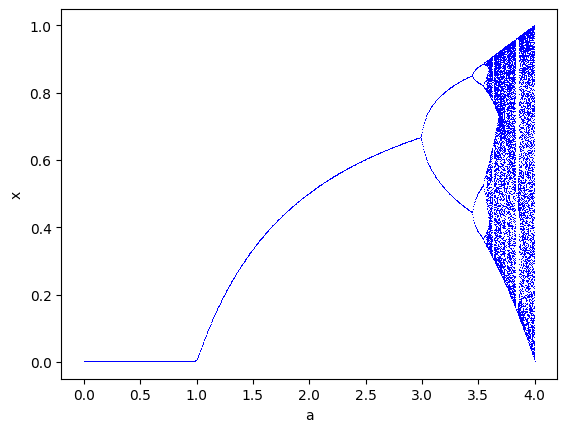

In [71]:
draw_orbit_chart([0,4], 0.5, process)

Напоминим, что наш процесс: x -> a * x * (1 - x)

Можно выделить несколько интервалов функции:

* При а от 0 до 1 процесс сходится к 0. 
* При а от 1 и почти до 3 процесс сходится к ненулевому корню уравнения x = a * x * (1 - x). 


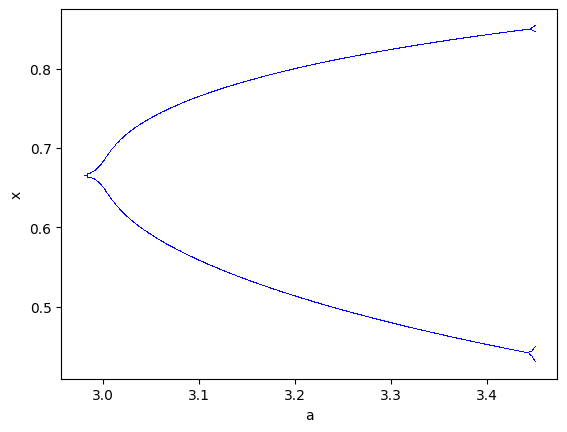

In [72]:
draw_orbit_chart([2.98,3.45], 0.5,process)

* Начиная примерно с 2.98 и до примерно 3.45 процесс сходится к *двум* значениям. 


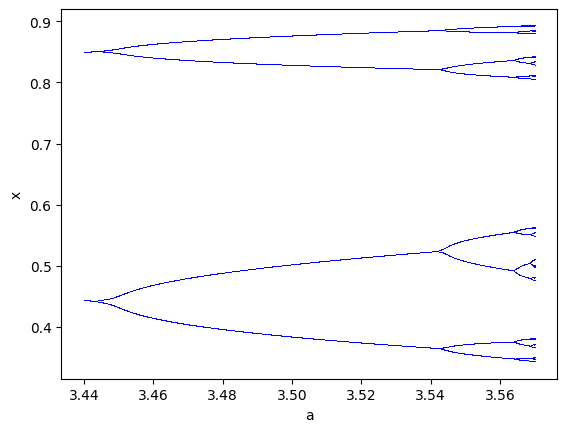

In [73]:
draw_orbit_chart([3.44,3.57], 0.5,process)

* В районе 3.45 орбита процесса раздваивается, и дальше начинает раздваиваться снова и снова и снова, пока в районе 3.58 посредовательность раздвоений не сходится. После этого начинается хаотическое поведение

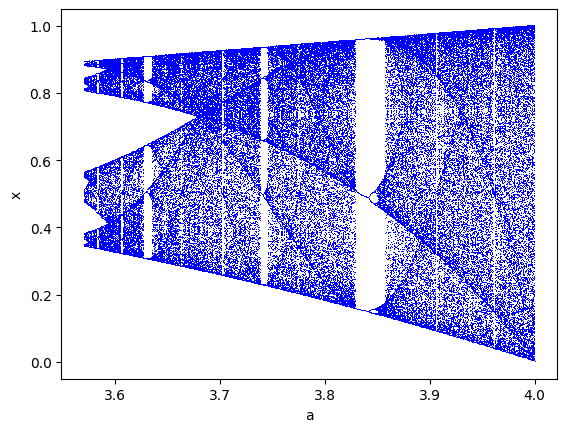

In [74]:
draw_orbit_chart([3.57,4], 0.5,process)

Мы можем наблюдать в некоторых диапазонах среди хаоса некие островки порядка. Самый крупный из их находится примерно в 3.828 - 3.858 и имеет длину орбиты 3. Внутри него тоже происходят удвоения периодов, причем каждая из трех ветвей в районе 3.85 погружается в свой собственный хаос.  

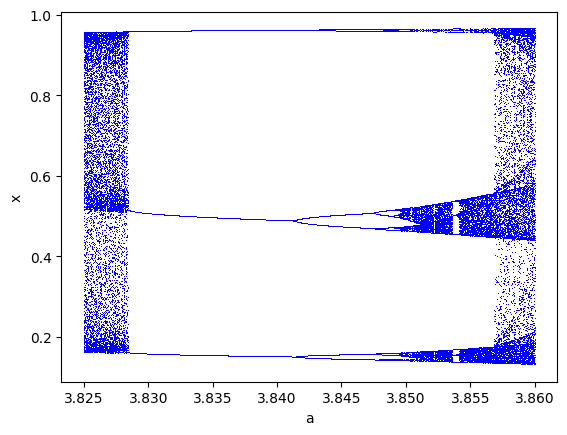

In [75]:
draw_orbit_chart([3.825,3.86], 0.5,process)

Удвоение периода орбиты в теории хаоса называется *биффуркацией*, а бесконечная сходящася серия удвоений - *каскадом биффуркаций*.

Вернемся к первому каскаду биффуркаций процесса:

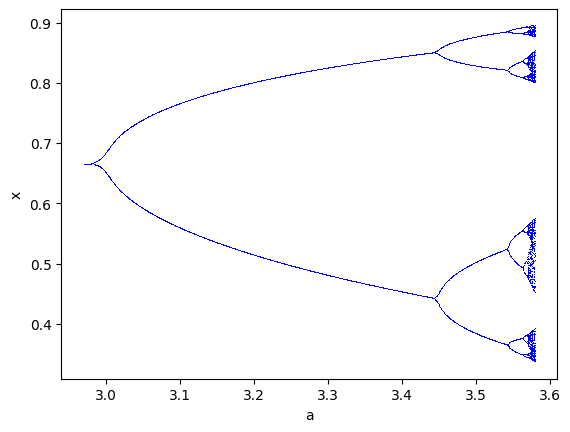

In [76]:
draw_orbit_chart([2.97,3.58], 0.5,process)

Зададим приблизительно точки биффуркаций

In [77]:

biffurcation = [
    3,
    3.44, 
    3.541, 
    3.564, 
    3.568, 
    3.57,
]


Удостоверимся, что это они

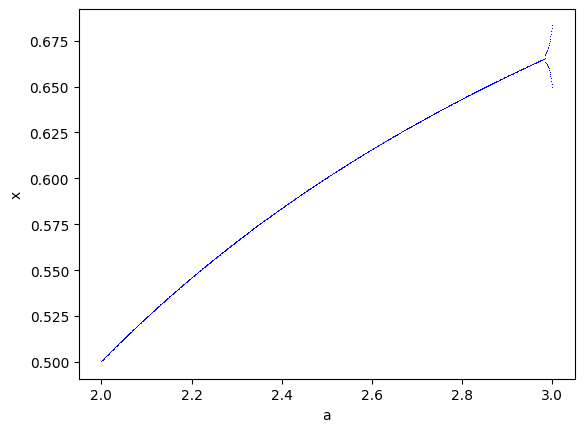

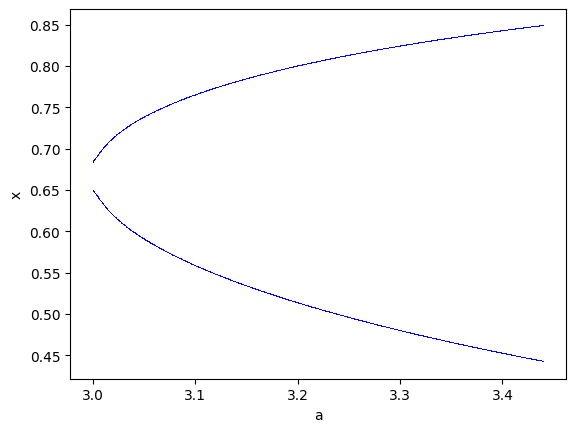

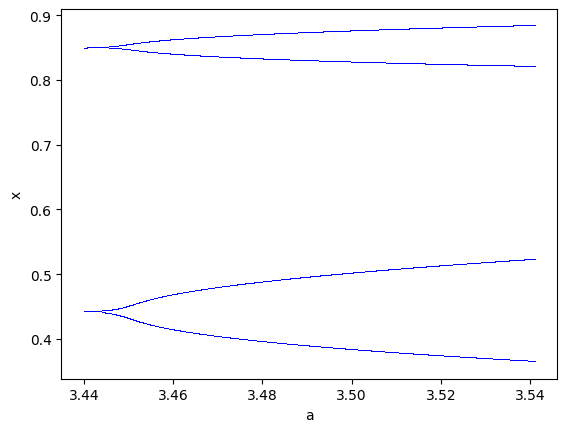

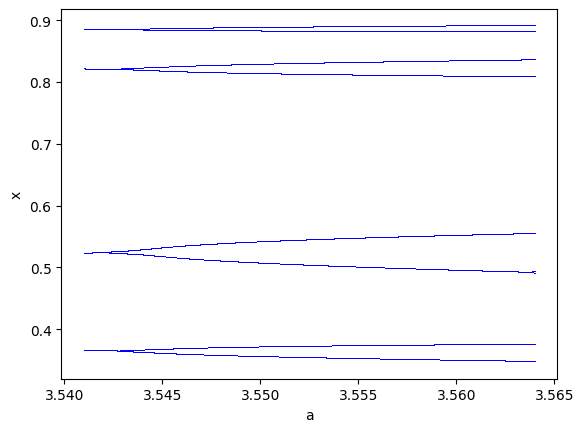

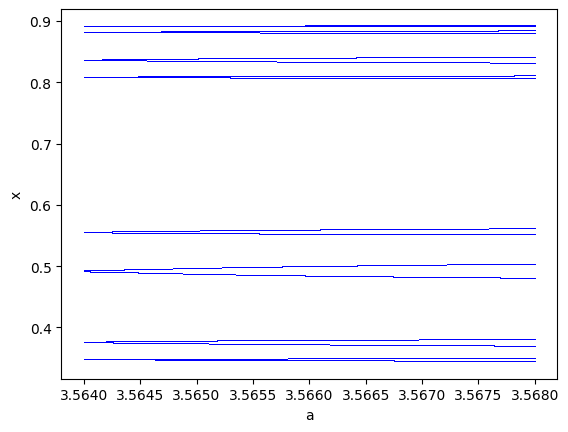

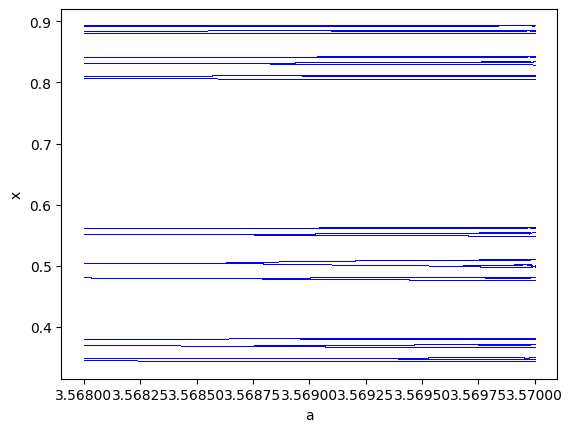

In [78]:
p = 2
for b in biffurcation:
    draw_orbit_chart([p, b], 0.5,process)
    p = b


biffurcation = [
    3,
    3.44, 
    3.541, 
    3.564, 
    3.568, 
    3.57,
]

Мы видим, что дистанция, которую нужно набрать а, что бы достичь следующей биффуркации уменьшается в геометрической прогрессии. 

Основание этой прогрессии (вернее, обратное к нему), сходится к *первой константе Фейгенбаума*, равной 4.669201... 

А предел отношений между шириной ветвей - ко *второй константе Фейгенбаума*, равной 2.502907...

Природа этих констант и по сей день остается достаточно загадочной.

## Глава третяя. Широкий взгляд

Когда современный математик видит некое загадочное явление, связанное с поведением функции, у него всегда есть соблазн посмотреть, что будет происходить, если в качестве аргументов функции подставить комлексные числа. Сделаем так и мы.

Будем исследовать устойчивость отображения x -> a * x * (1 - x) при разных (возможно, комплексных) а. 

Разделим все возможные (комплексные) а на два множества.

А именно: 
* если при неком а процесс имеет тенденцию убегать на бесконечность, поместим а в первое множество, 
* если при некотором а процесс имеет тенденцию оставаться в пределах единичного круга, поместим а во второе множество.

Нарисуем картинку, раскрасив первое множество черным цветом, а второе - белым

In [79]:
def draw_mandelbrots_chart(a_range, color):
    DPU = 600

    width  = a_range[0][1]-a_range[0][0]
    height = a_range[1][1]-a_range[1][0]

    if width < height:
        x_points, y_points = int(DPU*width/height), DPU
    else:
        x_points, y_points = DPU, int(DPU*height/width)

    xx = np.linspace(*a_range[0], x_points).reshape(1, -1)
    yy = np.linspace(*a_range[1], y_points)[::-1].reshape(-1, 1)
    zz = xx + 1j * yy
 
    zz = zz.ravel()

    calc_v = np.vectorize(color)

    image = calc_v(zz)

    image = np.reshape(image, (y_points, x_points))

    plt.xticks([0, x_points-1], [round(a_range[0][0],5), round(a_range[0][1],5)])
    plt.yticks([0, y_points-1], [round(a_range[1][1],5), round(a_range[1][0],5)])

    # cmap in ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
    plt.imshow(image, cmap="inferno")
    plt.show()

Для этого нам потребуется функция раскраски, которую мы создадим из исходного процесса:

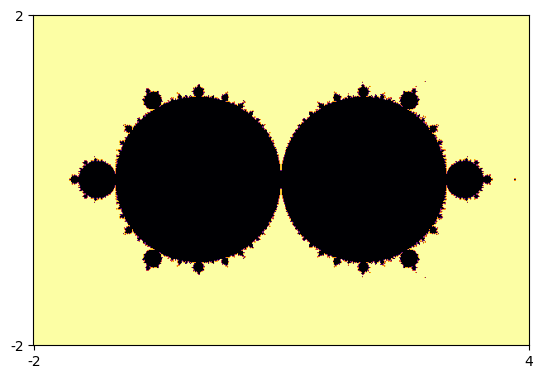

In [80]:
def color_bw(a):

    x0 = 0.5

    x = x0

    for _ in range(64):
        x = process(x, a)

        if abs(x) > 1:
            return 1

    return 0



draw_mandelbrots_chart([[-2, 4], [-2, 2]], color_bw)



Что бы сделать картинку интереснее, можно раскрашивать белое множество дальше, в зависимости от того, на каком шаге произошел уход за разрешенный интервал. Так мы сделаем акцент на границе.

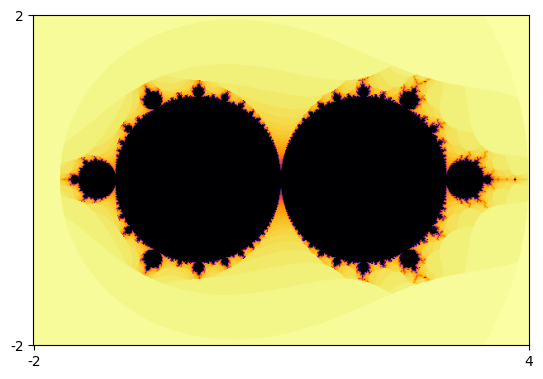

In [81]:
def color(a):

    x0 = 0.5

    x = x0

    for k in range(64):
        x = process(x, a)

        if abs(x) > 1:
            return 64-k

    return 0



draw_mandelbrots_chart([[-2, 4], [-2, 2]], color)

Рассмотрим подробнее некоторые кусочки

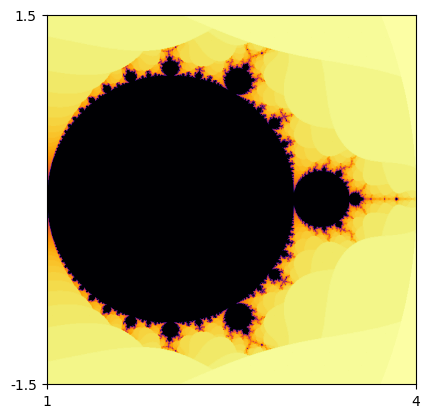

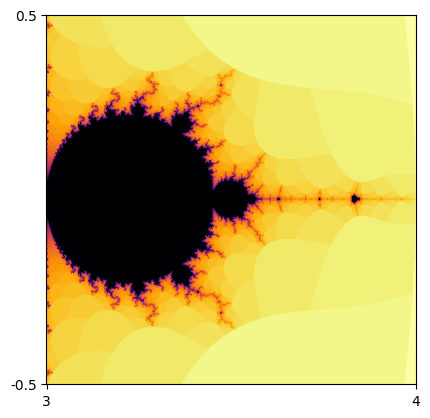

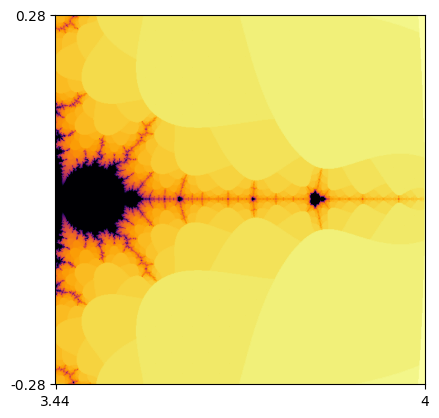

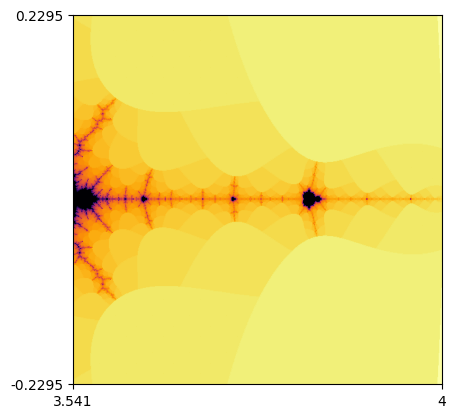

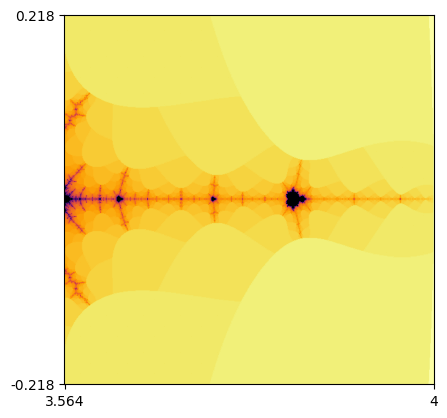

In [82]:

biffurcation = [
    1,
    3,
    3.44,
    3.541, 
    3.564, 
]


for b in biffurcation:
    draw_mandelbrots_chart([[b, 4], [-(4-b)/2, (4-b)/2]], color)


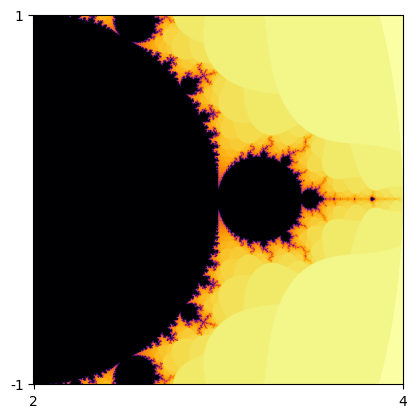

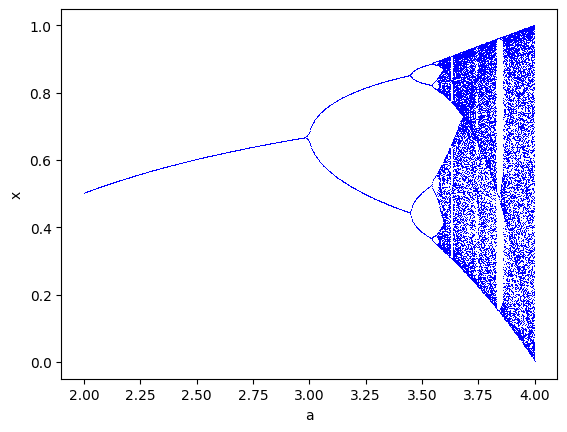

In [83]:
draw_mandelbrots_chart([[2, 4], [-1, 1]], color)
draw_orbit_chart([2,4], 0.5, process)

## Глава четвертая. Многочисленное семейство

Рассмотрим ещё две функции: `x -> a*sin(pi*x)` и `x -> x^2 + a`

In [85]:

def process1(x, a):
    return x**2 + a




In [86]:
def color1(a):

    x0 = 0

    x = x0

    for k in range(64):
        x = process1(x, a)

        if abs(x) > 2:
            return k

    return 0



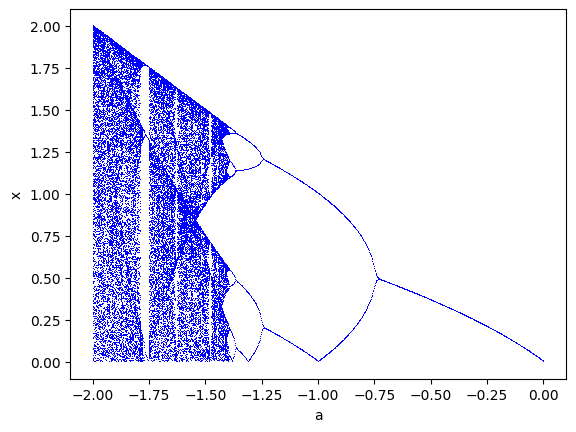

In [87]:

draw_orbit_chart([-2,0], 0, process1)

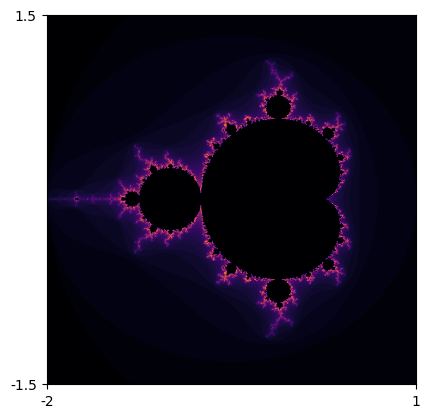

In [88]:
draw_mandelbrots_chart([[-2, 1], [-1.5, 1.5]], color1)

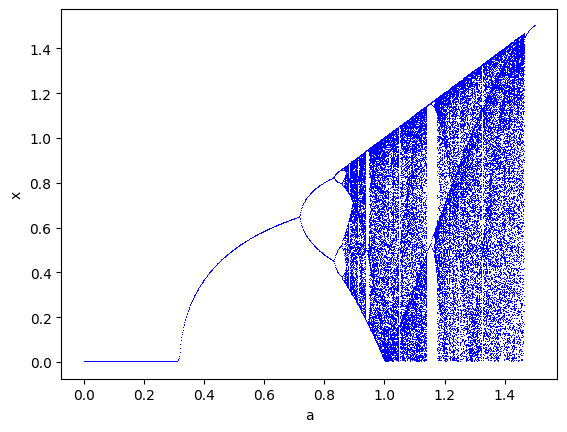

In [89]:
def process2(x, a):
    return a * np.sin(np.pi*x)


draw_orbit_chart([0,1.5], 0.5, process2)

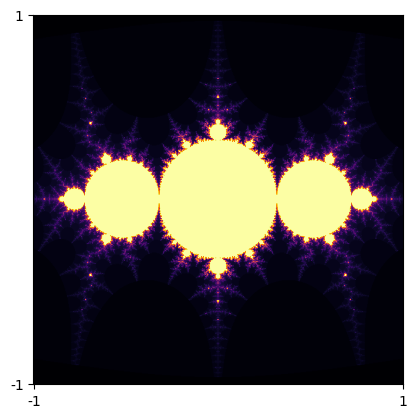

In [90]:
def color2(a):

    x0 = 0.5

    x = x0

    for k in range(64):
        x = process2(x, a)

        if abs(x) > 10:
            return k

    return 64

draw_mandelbrots_chart([[-1, 1], [-1, 1]], color2)

Темы на следующее занятие!
1) Проективная плоскость. Теоремы Чевы и Менелая
2) Подсчет графов и деревьев. Числа Каталана
3) Самое большое натуральное число